In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import time
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colorbar, colors
import matplotlib.cm as cm
from matplotlib import ticker
from matplotlib import cm
from matplotlib import rc
import pandas as pd
import matplotlib.style
import itertools
import IPython
horse = IPython.display.Audio(url="http://www.w3schools.com/html/horse.ogg",autoplay=True)

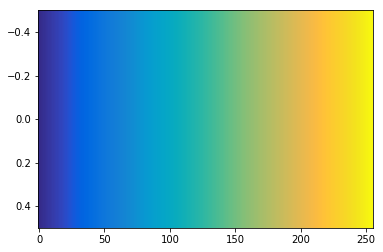

In [2]:
# 'Parula' colormap looks like in MATLAB
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
test_cm = parula_map
plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',cmap=parula_map)
plt.show()

In [3]:
# To use the colormap 'ssec','cmap_3gauss' of ncview in python
cmap_ssec = [
      0,0,45, 0,1,46, 0,2,47, 0,3,48, 0,5,49, 0,6,50, 0,7,51, 0,9,52, 
      0,10,53, 0,11,54, 0,13,55, 0,14,56, 0,15,57, 0,17,58, 0,18,59, 0,19,60, 
      0,21,62, 0,22,63, 0,23,64, 0,25,65, 0,26,66, 0,27,67, 0,29,68, 0,30,69, 
      0,31,70, 0,33,71, 0,34,72, 0,35,73, 0,37,74, 0,38,75, 0,39,76, 0,40,77, 
      0,42,79, 0,43,80, 0,44,81, 0,46,82, 0,47,83, 0,48,84, 0,50,85, 0,51,86, 
      0,52,87, 0,54,88, 0,55,89, 0,56,90, 0,58,91, 0,59,92, 0,60,93, 0,62,94, 
      0,63,96, 0,64,97, 0,66,98, 0,67,99, 0,68,100, 0,70,101, 0,71,102, 0,72,103, 
      0,74,104, 0,75,105, 0,76,106, 0,77,107, 0,79,108, 0,80,109, 0,81,110, 0,83,111, 
      0,84,113, 0,85,114, 0,87,115, 0,88,116, 0,89,117, 0,91,118, 0,92,119, 0,93,120, 
      0,95,121, 0,96,122, 0,97,123, 0,99,124, 0,100,125, 0,101,126, 0,103,127, 0,104,128, 
      0,105,130, 0,107,131, 0,108,132, 0,109,133, 0,111,134, 0,112,135, 0,113,136, 0,114,137, 
      0,116,138, 0,117,139, 0,118,140, 0,120,141, 0,121,142, 0,122,143, 0,124,144, 0,125,145, 
      0,126,147, 0,128,148, 0,129,149, 0,130,150, 0,132,151, 0,133,152, 0,134,153, 0,136,154, 
      0,137,155, 0,138,156, 0,140,157, 0,141,158, 0,142,159, 0,144,160, 0,145,161, 0,146,162, 
      0,148,164, 0,149,165, 0,150,166, 0,151,167, 0,153,168, 0,154,169, 0,155,170, 0,157,171, 
      0,158,172, 0,159,173, 0,161,174, 0,162,175, 0,163,176, 0,165,177, 0,166,178, 0,167,180, 
      0,169,181, 0,170,182, 0,171,183, 0,173,184, 0,174,185, 0,175,186, 0,177,187, 0,178,188, 
      0,179,189, 0,181,190, 0,182,191, 0,183,192, 0,185,193, 0,186,194, 0,187,195, 0,188,197, 
      0,190,198, 0,191,199, 0,192,200, 0,194,201, 0,195,202, 0,196,203, 0,198,204, 0,199,205, 
      0,200,206, 0,202,207, 0,203,208, 0,204,209, 0,206,210, 0,207,211, 0,208,212, 0,210,214, 
      0,211,215, 0,212,216, 0,214,217, 0,215,218, 0,216,219, 0,218,220, 0,219,221, 0,220,222, 
      0,222,223, 0,223,224, 0,224,225, 0,225,226, 0,227,227, 0,228,228, 0,229,229, 8,230,222, 
      17,231,214, 26,232,206, 34,233,198, 43,234,190, 52,235,182, 61,236,174, 70,236,166, 78,237,158, 
      87,238,150, 96,239,143, 105,240,135, 114,241,127, 122,242,119, 131,242,111, 140,243,103, 149,244,95, 
      157,245,87, 166,246,79, 175,247,71, 184,248,63, 193,248,55, 201,249,47, 210,250,39, 219,251,32, 
      228,252,24, 237,253,16, 245,254,8, 254,254,0, 255,250,0, 255,245,0, 255,240,0, 255,236,0, 
      255,231,0, 255,226,0, 255,221,0, 255,217,0, 255,212,0, 255,207,0, 255,202,0, 255,198,0, 
      255,193,0, 255,188,0, 255,183,0, 255,179,0, 255,174,0, 255,169,0, 255,164,0, 255,160,0, 
      255,155,0, 255,150,0, 255,145,0, 255,141,0, 255,136,0, 255,131,0, 255,126,0, 255,122,0, 
      253,117,0, 249,113,0, 246,109,0, 242,105,0, 239,101,0, 236,97,0, 232,93,0, 229,89,0, 
      225,85,0, 222,81,0, 219,77,0, 215,73,0, 212,69,0, 208,65,0, 205,61,0, 202,57,0, 
      198,53,0, 195,49,0, 191,45,0, 188,41,0, 185,37,0, 181,33,0, 178,29,0, 175,24,0]; 
cmap_3gauss = [
0,0,255, 0,0,255, 1,2,254, 2,4,253, 3,6,252, 4,9,251, 5,12,250, 6,16,249, 
7,21,248, 8,26,247, 9,32,246, 10,39,245, 11,46,244, 12,53,243, 13,61,242, 14,69,241, 
15,78,240, 16,87,239, 17,96,238, 18,105,237, 19,114,236, 20,123,235, 21,133,234, 22,142,233, 
23,151,232, 24,160,231, 25,169,230, 26,178,229, 27,186,228, 28,194,227, 29,202,226, 30,209,225, 
31,216,224, 32,223,223, 33,229,222, 34,234,221, 35,239,220, 36,243,219, 37,246,218, 38,249,217, 
39,251,216, 40,253,215, 41,253,214, 42,253,213, 43,253,212, 44,252,211, 45,250,210, 46,247,209, 
47,244,208, 48,240,207, 49,235,206, 50,230,205, 51,225,204, 52,218,203, 53,212,202, 54,205,201, 
55,197,200, 56,189,199, 57,181,198, 58,172,197, 59,163,196, 60,154,195, 61,145,194, 62,136,193, 
63,127,192, 64,117,191, 65,108,190, 66,99,189, 67,90,188, 68,81,187, 69,72,186, 70,64,185, 
71,56,184, 72,48,183, 73,41,182, 74,35,181, 75,28,180, 76,23,179, 77,18,178, 78,13,177, 
79,9,176, 80,6,175, 81,3,174, 82,1,173, 83,0,172, 84,0,171, 85,0,170, 86,0,169, 
87,2,168, 88,4,167, 89,7,166, 90,10,165, 91,14,164, 92,19,163, 93,24,162, 94,30,161, 
95,37,160, 96,44,159, 97,51,158, 98,59,157, 99,67,156, 100,75,155, 101,84,154, 102,93,153, 
103,102,152, 104,111,151, 105,120,150, 106,130,149, 107,139,148, 108,148,147, 109,157,146, 110,166,145, 
111,175,144, 112,184,143, 113,192,142, 114,200,141, 115,207,140, 116,214,139, 117,221,138, 118,227,137, 
119,232,136, 120,237,135, 121,241,134, 122,245,133, 123,248,132, 124,250,131, 125,252,130, 126,253,129, 
127,254,128, 128,253,127, 129,252,126, 130,250,125, 131,248,124, 132,245,123, 133,241,122, 134,237,121, 
135,232,120, 136,227,119, 137,221,118, 138,214,117, 139,207,116, 140,200,115, 141,192,114, 142,184,113, 
143,175,112, 144,166,111, 145,157,110, 146,148,109, 147,139,108, 148,130,107, 149,120,106, 150,111,105, 
151,102,104, 152,93,103, 153,84,102, 154,75,101, 155,67,100, 156,59,99, 157,51,98, 158,44,97, 
159,37,96, 160,30,95, 161,24,94, 162,19,93, 163,14,92, 164,10,91, 165,7,90, 166,4,89, 
167,2,88, 168,0,87, 169,0,86, 170,0,85, 171,0,84, 172,1,83, 173,3,82, 174,6,81, 
175,9,80, 176,13,79, 177,18,78, 178,23,77, 179,28,76, 180,35,75, 181,41,74, 182,48,73, 
183,56,72, 184,64,71, 185,72,70, 186,81,69, 187,90,68, 188,99,67, 189,108,66, 190,117,65, 
191,126,64, 192,136,63, 193,145,62, 194,154,61, 195,163,60, 196,172,59, 197,181,58, 198,189,57, 
199,197,56, 200,205,55, 201,212,54, 202,218,53, 203,225,52, 204,230,51, 205,235,50, 206,240,49, 
207,244,48, 208,247,47, 209,250,46, 210,252,45, 211,253,44, 212,253,43, 213,253,42, 214,253,41, 
215,251,40, 216,249,39, 217,246,38, 218,243,37, 219,239,36, 220,234,35, 221,229,34, 222,223,33, 
223,216,32, 224,209,31, 225,202,30, 226,194,29, 227,186,28, 228,178,27, 229,169,26, 230,160,25, 
231,151,24, 232,142,23, 233,133,22, 234,123,21, 235,114,20, 236,105,19, 237,96,18, 238,87,17, 
239,78,16, 240,69,15, 241,61,14, 242,53,13, 243,46,12, 244,39,11, 245,32,10, 246,26,9, 
247,21,8, 248,16,7, 249,12,6, 250,8,5, 251,5,4, 252,3,3, 253,1,2, 255,0,1];# values from ncview
cmap_jaisnd = [46,  0,127,  45,  0,133,  43,  0,139,
  40,  0,144,  37,  0,150,  34,  0,155,  31,  0,160,  27,  0,165,  23,  0,169,
  19,  0,174,  14,  0,178,  10,  0,182,   5,  0,186,   0,  0,190,   0,  4,194,
   0, 10,197,   0, 15,201,   0, 21,204,   0, 26,207,   0, 32,210,   0, 38,213,
   0, 44,216,   0, 49,219,   0, 55,221,   0, 61,224,   0, 67,226,   0, 73,228,
   0, 78,230,   0, 84,232,   0, 90,234,   0, 95,236,   0,100,237,   0,106,239,
   0,111,240,   0,116,242,   0,121,243,   0,126,244,   0,131,245,   0,136,246,
   0,141,247,   0,145,248,   0,150,249,   0,154,249,   0,158,250,   0,162,251,
   0,166,251,   0,170,252,   0,174,252,   0,178,253,   0,181,253,   0,185,253,
   0,188,253,   0,192,254,   0,195,254,   0,198,254,   0,201,254,   0,204,254,
   0,208,254,   0,211,254,   0,214,254,   0,217,254,   1,220,254,   1,223,254,
   2,225,254,   2,228,255,   3,231,255,   4,234,255,   5,237,255,   6,240,255,
   7,243,255,   8,246,255,   9,249,255,  10,252,255,  12,255,254,  13,255,251,
  15,255,248,  16,255,245,  18,255,242,  20,255,239,  21,255,236,  23,255,233,
  25,255,230,  28,255,227,  30,255,224,  32,255,221,  34,255,218,  37,255,215,
  39,255,212,  42,255,209,  45,255,206,  47,255,204,  50,255,201,  53,255,198,
  56,255,196,  59,255,193,  63,255,191,  66,255,189,  69,255,187,  73,255,185,
  76,255,183,  80,255,181,  84,255,180,  88,255,178,  91,255,177,  96,255,176,
 100,255,175, 104,255,175, 108,255,175, 113,255,174, 117,255,174, 122,255,175,
 127,255,175, 132,255,176, 137,255,178, 142,255,179, 148,255,181, 154,255,183,
 159,255,186, 165,255,188, 172,255,192, 178,255,196, 185,255,200, 192,255,205,
 200,255,210, 209,255,216, 218,255,223, 229,255,232, 243,255,244, 251,255,243,
 248,255,229, 245,255,218, 243,255,209, 242,255,200, 241,255,192, 240,255,185,
 240,255,178, 239,255,172, 239,255,165, 239,255,159, 240,255,154, 240,255,148,
 241,255,142, 242,255,137, 242,255,132, 243,255,127, 244,255,122, 245,255,117,
 247,255,113, 248,255,108, 249,255,104, 251,255,100, 252,255, 96, 254,255, 91,
 255,254, 88, 255,252, 84, 255,250, 80, 255,248, 76, 255,247, 73, 255,245, 69,
 255,243, 66, 255,241, 63, 255,239, 59, 255,237, 56, 255,235, 53, 255,233, 50,
 255,231, 47, 255,228, 45, 255,226, 42, 255,224, 39, 255,222, 37, 255,219, 34,
 255,217, 32, 255,215, 30, 255,212, 28, 255,210, 25, 255,207, 23, 255,204, 21,
 255,202, 20, 255,199, 18, 255,196, 16, 255,193, 15, 255,190, 13, 255,187, 12,
 255,183, 10, 255,180,  9, 255,177,  8, 255,173,  7, 255,170,  6, 255,166,  5,
 255,162,  4, 255,158,  3, 255,154,  2, 254,150,  2, 254,146,  1, 254,142,  1,
 254,138,  0, 254,133,  0, 254,129,  0, 254,124,  0, 254,119,  0, 254,114,  0,
 254,109,  0, 254,104,  0, 254, 99,  0, 253, 94,  0, 253, 88,  0, 253, 83,  0,
 253, 77,  0, 252, 71,  0, 252, 65,  0, 251, 59,  0, 251, 53,  0, 250, 47,  0,
 249, 41,  0, 249, 34,  0, 248, 28,  0, 247, 21,  0, 246, 15,  0, 245,  8,  0,
 244,  2,  0, 243,  0,  4, 242,  0, 10, 240,  0, 17, 239,  0, 24, 237,  0, 30,
 236,  0, 37, 234,  0, 43, 232,  0, 49, 230,  0, 55, 228,  0, 61, 226,  0, 67,
 224,  0, 73, 221,  0, 79, 219,  0, 84, 216,  0, 89, 213,  0, 94, 210,  0, 99,
 207,  0,104, 204,  0,108, 201,  0,112, 197,  0,116, 194,  0,119, 190,  0,122,
 186,  0,125, 182,  0,127, 178,  0,129, 174,  0,130, 169,  0,132, 165,  0,132,
 160,  0,133, 155,  0,132, 150,  0,132, 144,  0,131, 139,  0,129, 133,  0,127,
                                                                127,  0,125 ]
def ncview_to_py(values):
    lrange = np.linspace(0,1,np.size(values)/3) # First column indicate the normalized values in the colormap
    lred = []
    lgreen = []
    lblue = []
    i=0
    # Loop over the whole array and get RGB values for individual array
    while i < np.shape(values)[0]:
        lred.append(values[i])
        lgreen.append(values[i+1])
        lblue.append(values[i+2])
        i = i + 3 # RGB!
    lred = [x / 256 for x in lred]# Normalize the value
    lgreen = [x / 256 for x in lgreen]# Normalize the value
    lblue = [x / 256 for x in lblue]# Normalize the value
    llred = ()
    llgreen = ()
    llblue = ()
    i = 0
    # Assemble the array in the 'cdict' convention
    while i < np.shape(lrange)[0]:
        llred = llred + ((lrange[i],lred[i],lred[i]),)
        llgreen = llgreen + ((lrange[i],lgreen[i],lgreen[i]),)
        llblue = llblue + ((lrange[i],lblue[i],lblue[i]),)
        i = i + 1
    # Make the cdict
    cdict = {}
    cdict = {'red':llred,'green':llgreen,'blue':llblue}
    return(cdict)

In [4]:
# Make a custom colormap to show the profile 'correctly'
class nlcmap(LinearSegmentedColormap):
    name = 'nlcmap'
    def __init__(self, cmap, levels):
        self.cmap = cmap
        self.monochrome = self.cmap.monochrome
        self.levels = np.asarray(levels, dtype='float64')
        self._x = self.levels/ self.levels.max()
        self.levmax = self.levels.max()
        self.levmin = self.levels.min()
        self._y = np.linspace(self.levmin, self.levmax, len(self.levels))
    def __call__(self, xi, alpha=1.0, **kw):
        yi = interp(xi, self._x, self._y)
        return self.cmap(yi/self.levmax, alpha)
# Defines the colormap using levels and builtin colormap
levelss = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
levels = [x * 3 for x in levelss]# Normalize the value
cmap_lin = cm.jet_r
cmap_nonlin = nlcmap(cmap_lin, levels)

In [5]:
def window_qui(x,y,utemp,vtemp,wtemp):
    # Make it less condensed to have a better look. aim 16*8 horizontal and 25*8 vertical with a 8*8 window.
    #                                                   30*8 horizontal and 25*8
    #                                                   16*8 horizontal and 50*8
    hori  = 18# 16/25/8 for 128*128*200 #30/50/8 for 240*240*400 #18/50/8 for 144*144*400
    vert  = 50
    ltime = 8
    u_dir = np.zeros([vert,hori])
    v_dir = np.zeros([vert,hori])
    w_dir = np.zeros([vert,hori])
    x_dir = np.zeros(hori)
    y_dir = np.zeros(hori)
    z_dir = np.zeros(vert)
    for i in range(hori):
        x_dir[i] = np.mean(x[i*ltime-1])
        y_dir[i] = np.mean(y[i*ltime-1])
        for j in range(vert):
            u_dir[j][i] = np.mean(utemp[j*ltime-1,i*ltime-1])
            v_dir[j][i] = np.mean(vtemp[j*ltime-1,i*ltime-1])
            w_dir[j][i] = np.mean(wtemp[j*ltime-1,i*ltime-1])
            z_dir[j] = np.mean(z[j*ltime-1])
    return(u_dir,v_dir,w_dir,x_dir,y_dir,z_dir)

In [6]:
# Make some new colormap for better look using colormap setup directly from ncview
jaisnd = LinearSegmentedColormap('jaisnd', ncview_to_py(cmap_jaisnd))
ssec = LinearSegmentedColormap('ssec', ncview_to_py(cmap_ssec))
egauss = LinearSegmentedColormap('egauss', ncview_to_py(cmap_3gauss))
cmap_octant = colors.ListedColormap(['#ff81c0', '#ffff14', '#f97306', '#e50000', '#96f97b', '#033500', '#00035b', '#0485d1'])
cmap_quadrant = colors.ListedColormap(['#f97306','#e50000', '#00035b', '#0485d1'])

/Users/jiachenlu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [7]:
# Read the field data
i = 11  # Time index
itime = i * 600 # Save the fielddump every 600s
SBLtemp = Dataset('sc001.nc').variables['sc001'][i,:,:,:]
SFTtemp = Dataset('sc002.nc').variables['sc002'][i,:,:,:]
qltemp = Dataset('ql.nc').variables['ql'][i,:,:,:] * 1e2 # 1e-5kg/kg originally. Now g/kg
qttemp = Dataset('qt.nc').variables['qt'][i,:,:,:]
#buoytemp = Dataset('buoy.nc').variables['buoy'][i,:,:,:]
thltemp = Dataset('thl.nc').variables['thl'][i,:,:,:]
wtemp = Dataset('w.nc').variables['w'][i,:,:,:]
utemp = Dataset('u.nc').variables['u'][i,:,:,:]
vtemp = Dataset('v.nc').variables['v'][i,:,:,:]

In [561]:
itime

6600

In [8]:
xp = np.shape(qltemp)[1]
yp = np.shape(qltemp)[2]
zp = np.shape(qltemp)[0]

In [9]:
# Read the profile and tmser data
z = Dataset('profiles.001.nc').variables['zt'][0:400]
cfrac = Dataset('profiles.001.nc').variables['cfrac'][itime / 60,:]
zi = Dataset('tmser.001.nc').variables['zi'][itime / 60]
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
xx,zz = np.meshgrid(x,z)
xxx,yyy = np.meshgrid(x,y)

In [10]:
# Constant here
densityAir = 1.2754
grav = 9.81


In [11]:
# Calculate the LWP and show the colormap.
LWP = np.zeros([xp,yp])
for x_index in range(xp):
    for y_index in range(yp):
        LWP[x_index,y_index] = np.trapz(qltemp[: , x_index, y_index],z) * densityAir * 1e2

In [ ]:
# Show the LWP plot
cs = plt.contourf(xxx,yyy,LWP,200,cmap = 'Blues_r')
plt.title('Liquid water path [$g/m^{2}$]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Y [m]',fontsize=15)
plt.colorbar(cs, shrink=0.9)

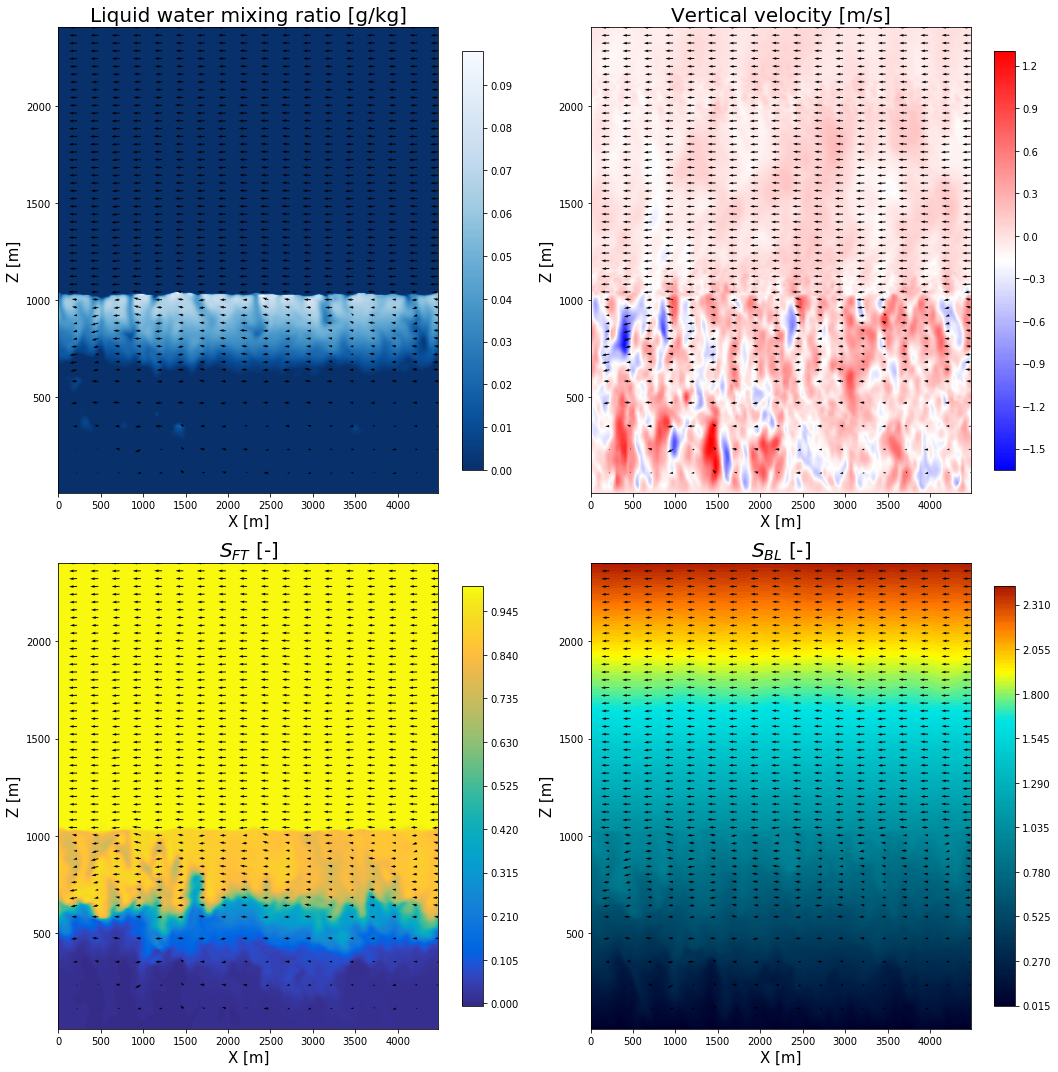

In [433]:
j = 21 ## Cross-section
ql_2d = qltemp[:,j,:] * 1e2 # g/kg
qt_2d = qttemp[:,j,:]
SBL_2d = SBLtemp[:,j,:]
SFT_2d = SFTtemp[:,j,:]
thl_2d = thltemp[:,j,:]
thv_2d = thv[:,j,:]
w_2d = wtemp[:,j,:]
u_2d = utemp[:,j,:]
v_2d = vtemp[:,j,:]
[u_dir,v_dir,w_dir,x_dir,y_dir,z_dir] = window_qui(x,y,u_2d,v_2d,w_2d) # Use a small average window to get a better look
fig, axs = plt.subplots(2, 2,figsize=(15,15))
#fig.suptitle('Cross-section at Y=35m at 4h (Stratocumulus)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql_2d,200,cmap = 'Blues_r')

plt.quiver(x_dir, z_dir, u_dir, w_dir)

plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w_2d,200,cmap='bwr')

plt.quiver(x_dir, z_dir, u_dir, w_dir)

plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)

ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT_2d,200,cmap=parula_map)
plt.quiver(x_dir, z_dir, u_dir, w_dir)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
#cs.set_clim(0,1) #correct

ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL_2d,200, cmap=ssec)
plt.quiver(x_dir, z_dir, u_dir, w_dir)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
fig.tight_layout()
plt.savefig('1.eps')

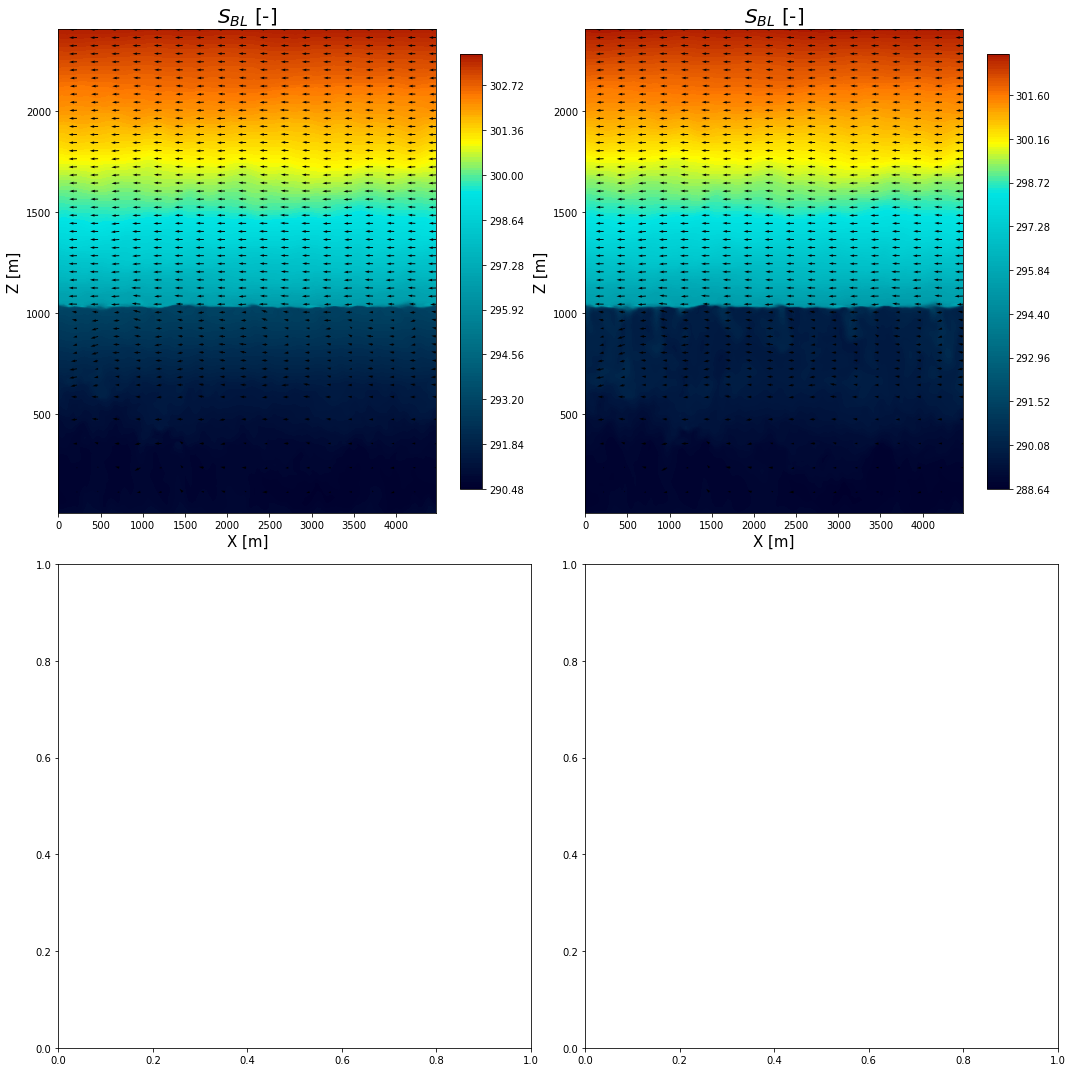

In [436]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
ax=plt.subplot(221)
cs = ax.contourf(xx,zz,thv_2d,200, cmap=ssec)
plt.quiver(x_dir, z_dir, u_dir, w_dir)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
fig.tight_layout()
ax=plt.subplot(222)
cs = ax.contourf(xx,zz,thl_2d,200, cmap=ssec)
plt.quiver(x_dir, z_dir, u_dir, w_dir)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
fig.tight_layout()
plt.savefig('1.eps')

In [ ]:
h_index = 19
thl_kde = thltemp[h_index,:,:].ravel()
qt_kde = qttemp[h_index,:,:].ravel()
w_kde = wtemp[h_index,:,:].ravel()
sns.set_style("white")
plt.subplots(1, 2,figsize=(10,6),sharey=True)
plt.suptitle('"Mirror" relation of the $q_t$ and $\\theta_l$',fontsize=15)
plt.subplot(1, 2, 1)
ax = sns.kdeplot(qt_kde, w_kde, gridsize = 100, cut = 10,cbar = False,shade = False,
               cmap = 'tab20',norm = matplotlib.colors.LogNorm(0.0001,1.20),levels=np.logspace(-3, 1, 14))
ax.set_title('PDF for dummy pure Gaussian $q_t$ and w',fontsize=15)
ax.set_ylabel('$w-\overline{w} \ [m \ s^{-1}]$',fontsize=15)
ax.set_xlabel('$q_t-\overline{q_t} \ [g \ kg^{-1}]$',fontsize=15)
ax.grid(color = 'k', linestyle = ':', linewidth=0.5)
plt.subplot(1, 2, 2)
ax = sns.kdeplot(thl_kde, w_kde, gridsize = 100, cut = 10,cbar = False,shade = False,
               cmap = 'tab20',norm = matplotlib.colors.LogNorm(0.0001,1.20),levels = np.logspace(-3, 1, 14))
#g.figure.set_suptitle('Joint PDF for $q_t$ and $w$')
ax.set_title('PDF for dummy pure Gaussian $\\theta_l$ and w',fontsize=15)
#ax.set_ylabel('$w-\overline{w} \ [m \ s^{-1}]$')
ax.set_xlabel('$\\theta_l-\overline{\\theta_l} \ [K]$',fontsize=15)
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

In [429]:
# Find the perturbuation
ql_avg  = np.zeros(zp)
qt_avg  = np.zeros(zp)
thl_avg = np.zeros(zp)
thv_avg = np.zeros(zp)
u_avg   = np.zeros(zp)
TKE_avg = np.zeros(zp)
v_avg   = np.zeros(zp)
w_avg   = np.zeros(zp)
SBL_avg = np.zeros(zp)
SBLp = np.zeros([zp,xp,yp])
thlp = np.zeros([zp,xp,yp])
thvp = np.zeros([zp,xp,yp])
qtp = np.zeros([zp,xp,yp])
qlp = np.zeros([zp,xp,yp])
up   = np.zeros([zp,xp,yp])
wp   = np.zeros([zp,xp,yp])
vp   = np.zeros([zp,xp,yp])
for j in range(zp):
    ql_avg[j] = np.mean(qltemp[j,:,:])
    qt_avg[j] = np.mean(qttemp[j,:,:])
    SBL_avg[j] = np.mean(SBLtemp[j,:,:])
    thl_avg[j] = np.mean(thltemp[j,:,:])
    thv_avg[j] = np.mean(thv[j,:,:])
    u_avg[j] = np.mean(utemp[j,:,:])
    v_avg[j] = np.mean(vtemp[j,:,:])
    w_avg[j] = np.mean(wtemp[j,:,:])
    TKE_avg[j] = np.mean(TKE[j,:,:])
# Find the perturbation
for x_index in range(xp):
    for y_index in range(yp):
        for z_index in range(zp):
            pt = [[z_index],[x_index],[y_index]]
            SBLp[pt] = SBLtemp[pt] - SBL_avg[z_index]
            thlp[pt] = thltemp[pt] - thl_avg[z_index]
            thvp[pt] = thv[pt] - thv_avg[z_index]
            qlp[pt]  = qltemp[pt] - ql_avg[z_index]
            qtp[pt]  = qttemp[pt] - qt_avg[z_index]
            wp[pt]   = wtemp[pt] - w_avg[z_index]
            up[pt]   = utemp[pt] - u_avg[z_index]
            vp[pt]   = vtemp[pt] - v_avg[z_index]

In [412]:
# Calculate additional variables
# Calculate the thv{mass:kg,engergy:J,temperature:K}
thv = np.zeros([zp,xp,yp])
for x_index in range(xp):
    for y_index in range(yp):
        for z_index in range(zp):
            pt = [[z_index],[x_index],[y_index]]
            thv[pt] = (1 + 0.608 * qttemp[pt] - qltemp[pt] / 0.622) * (thltemp[pt] + 2.5e3  * qltemp[pt])

In [549]:
# Calculate the TKE{mass:kg,engergy:J,temperature:K}
TKE = np.zeros([zp,xp,yp])
for x_index in range(xp):
    for y_index in range(yp):
        for z_index in range(zp):
            pt = [[z_index],[x_index],[y_index]]
            TKE[pt] = 1/2 * (up[pt] ** 2 + vp[pt] ** 2 + wp[pt] ** 2)

In [15]:
# Find the inversion vertical grid
# Find inversion height with various method
for z_index in range(np.shape(cfrac)[0]):
    if cfrac[np.shape(cfrac)[0] - z_index - 1] != 0:
        zi_cl = np.shape(cfrac)[0] - z_index - 1 
        break
print ('break in %s'% zi_cl)
zi_cl_index = np.shape(cfrac)[0] - z_index - 1
zi_cl = z[zi_cl_index]

for z_index in range(zp):
    if ql_avg[zp - z_index - 1] != 0:
        zi_ql = zp - z_index - 1
        break
print ('break in %s'% zi_ql)
zi_ql_index = zp - z_index - 1
zi_ql = z[zi_ql_index]

break in 72
break in 137


/Users/jiachenlu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


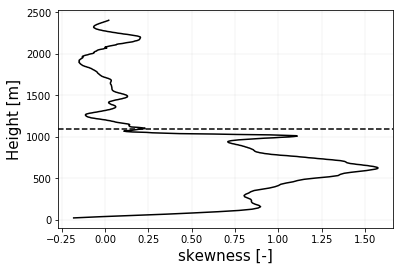

In [504]:
# Vertical velocity skewness
# Find the 'Concave' shape
wpt = np.square(wp)
wptt = np.power(wp, 3)
for z_index in range(zp):
    temp = np.mean(wpt[z_index,:,:])
    skewness[z_index] = np.mean(wptt[z_index,:,:]) / temp ** (3/2)
plt.plot(skewness,z,color = 'black')
plt.ylabel('Height [m]',fontsize = 15)
plt.xlabel(r'skewness [-]',fontsize = 15)
plt.grid(color = 'k', linewidth = 0.05)
plt.axhline(y = zi_ql,color='k', linestyle='--')

$\text{CF(thr)} = \int^{z_{top}}_0\left.\overline{w'\theta_l'}_{\text{down}}dz\right.-\int^{z_{top}}_0\left.\overline{w'\theta_l'}_{\text{entr}}dz\right.$ 
$S_{FT}^{\star}=S_{FT}-thr_0$
### Get SFT^{\star}  || convective/coherent structures || if SFT\star < 0 all the same if not tropospheric provenance
## The new clusters are found in the cloud region only
## Trace the air from free-troposphere(Warm and dry)
## Maximize the separation between the descending air that is warm (coming from the inversion layer or the free troposphere) from the descending air that is cold (coming from the PBL).

In [608]:
# Long program and big loop
# To Find a 'proper' value for SFT to show the octant right(Filter out PBL originated downdraft)
# Calculate the heat flux for each octant and the octant
# Find a proper thr_0 for SFT_star
thr_0 = 0
aim = 20
EN_count = np.zeros([zp,aim])
DD_count = np.zeros([zp,aim])
MU_count = np.zeros([zp,aim])
AS_count = np.zeros([zp,aim])
UU_count = np.zeros([zp,aim])
ES_count = np.zeros([zp,aim])
MS_count = np.zeros([zp,aim])
SS_count = np.zeros([zp,aim])
EN_flx = np.zeros([zp,aim])
DD_flx = np.zeros([zp,aim])
MU_flx = np.zeros([zp,aim])
AS_flx = np.zeros([zp,aim])
UU_flx = np.zeros([zp,aim])
ES_flx = np.zeros([zp,aim])
MS_flx = np.zeros([zp,aim])
SS_flx = np.zeros([zp,aim])
octant = np.zeros([zp,xp,yp,aim],dtype = int) - 1e-12 # Little hack to get a usable colorbar
for increment in range(aim): # 0.009
    thr = thr_0 + increment * 0.001 ## Too large all SFT nagative --> downdraft ## Too small all SFT positive --> Entrainment
    SFTstar = SFTtemp - thr
    # Calculate the turbulent heat flux for each octant
    for z_index in range(zp):
        for x_index in range(xp):
            for y_index in range(yp):
                if (SFTstar[z_index,x_index,y_index] > 0 and # Entrainment
                    SBLp[z_index,x_index,y_index] > 0 and
                    wp[z_index,x_index,y_index] < 0):
                    EN_count[z_index,increment] = EN_count[z_index,increment] + 1
                    EN_flx[z_index,increment] = EN_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 5
                if (SFTstar[z_index,x_index,y_index] < 0 and # downdrafts
                    SBLp[z_index,x_index,y_index] > 0 and
                    wp[z_index,x_index,y_index] < 0):
                    DD_count[z_index,increment] = DD_count[z_index,increment] + 1
                    DD_flx[z_index,increment] = DD_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 7
                if (SFTstar[z_index,x_index,y_index] < 0 and # Subsiding shell
                    SBLp[z_index,x_index,y_index] < 0 and
                    wp[z_index,x_index,y_index] < 0):
                    SS_count[z_index,increment] = SS_count[z_index,increment] + 1
                    SS_flx[z_index,increment] = SS_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 8
                if (SFTstar[z_index,x_index,y_index] > 0 and # Mixing updraft
                    SBLp[z_index,x_index,y_index] < 0 and
                    wp[z_index,x_index,y_index] > 0):
                    MU_count[z_index,increment] = MU_count[z_index,increment] + 1
                    MU_flx[z_index,increment] = MU_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 2
                if (SFTstar[z_index,x_index,y_index] < 0 and # Ascending shell
                    SBLp[z_index,x_index,y_index] > 0 and
                    wp[z_index,x_index,y_index] > 0):
                    AS_count[z_index,increment] = AS_count[z_index,increment] + 1
                    AS_flx[z_index,increment] = AS_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 3
                if (SFTstar[z_index,x_index,y_index] < 0 and # Updraft
                    SBLp[z_index,x_index,y_index] < 0 and
                    wp[z_index,x_index,y_index] > 0):
                    UU_count[z_index,increment] = UU_count[z_index,increment] + 1
                    UU_flx[z_index,increment] = UU_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 4
                if (SFTstar[z_index,x_index,y_index] > 0 and # Entrainment shell
                    SBLp[z_index,x_index,y_index] > 0 and
                    wp[z_index,x_index,y_index] > 0):
                    ES_count[z_index,increment] = ES_count[z_index,increment] + 1
                    ES_flx[z_index,increment] = ES_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 1
                if (SFTstar[z_index,x_index,y_index] > 0 and # Mixing shell
                    SBLp[z_index,x_index,y_index] < 0 and
                    wp[z_index,x_index,y_index] < 0):
                    MS_count[z_index,increment] = MS_count[z_index,increment] + 1
                    MS_flx[z_index,increment] = MS_flx[z_index,increment] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                    octant[z_index,x_index,y_index,increment] = 6
IPython.display.display(horse)

In [647]:
xp

144

In [614]:
# Do the integration and eliminate the NaN value
EN_flxm = np.zeros([zp,aim])
DD_flxm = np.zeros([zp,aim])
MU_flxm = np.zeros([zp,aim])
AS_flxm = np.zeros([zp,aim])
UU_flxm = np.zeros([zp,aim])
ES_flxm = np.zeros([zp,aim])
MS_flxm = np.zeros([zp,aim])
SS_flxm = np.zeros([zp,aim])
slab_count = xp * yp
for increment in range(aim): 
    EN_flxm[:,increment] = EN_flx[:,increment] / slab_count
    DD_flxm[:,increment] = DD_flx[:,increment] / slab_count
    UU_flxm[:,increment] = UU_flx[:,increment] / slab_count
    SS_flxm[:,increment] = SS_flx[:,increment] / slab_count
    MS_flxm[:,increment] = MS_flx[:,increment] / slab_count
    AS_flxm[:,increment] = AS_flx[:,increment] / slab_count
    ES_flxm[:,increment] = ES_flx[:,increment] / slab_count
    MU_flxm[:,increment] = MU_flx[:,increment] / slab_count
EN_flxm[np.isnan(EN_flxm)] = 0
DD_flxm[np.isnan(DD_flxm)] = 0
UU_flxm[np.isnan(UU_flxm)] = 0
SS_flxm[np.isnan(SS_flxm)] = 0
MS_flxm[np.isnan(MS_flxm)] = 0
AS_flxm[np.isnan(AS_flxm)] = 0
ES_flxm[np.isnan(ES_flxm)] = 0
MU_flxm[np.isnan(MU_flxm)] = 0

EN_int = np.zeros(aim)
DD_int = np.zeros(aim)
UU_int = np.zeros(aim)
SS_int = np.zeros(aim)
MS_int = np.zeros(aim)
AS_int = np.zeros(aim)
ES_int = np.zeros(aim)
MU_int = np.zeros(aim)
for increment in range(aim): 
    EN_int[increment] = np.trapz(EN_flxm[:,increment], z)
    DD_int[increment] = np.trapz(DD_flxm[:,increment], z)
    UU_int[increment] = np.trapz(UU_flxm[:,increment], z)
    SS_int[increment] = np.trapz(SS_flxm[:,increment], z)
    MS_int[increment] = np.trapz(MS_flxm[:,increment], z)
    AS_int[increment] = np.trapz(AS_flxm[:,increment], z)
    ES_int[increment] = np.trapz(ES_flxm[:,increment], z)
    MU_int[increment] = np.trapz(MU_flxm[:,increment], z)

Text(0.5,0,'Threshold')

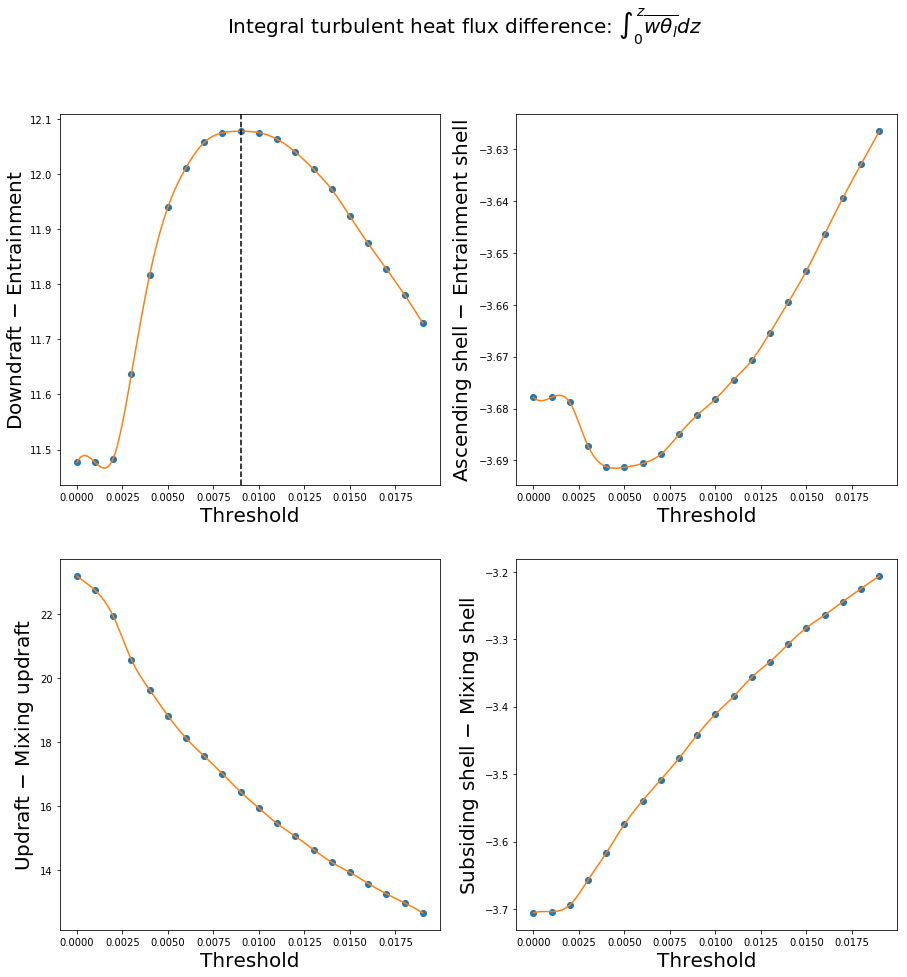

In [627]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plt.suptitle('Integral turbulent heat flux difference: $\int^{z}_0{\overline{w\\theta_l}dz}$',fontsize=20)
thre = np.linspace(0,19,20) * 0.001# Reconstruct the threshold array to show it on the plot
xnew = np.linspace(0,19,100) * 0.001
# Do the interpolation
DDEN = interp1d(thre, DD_int - EN_int, kind='cubic')
ASES = interp1d(thre, AS_int - ES_int, kind='cubic')
UUMU = interp1d(thre, UU_int - MU_int, kind='cubic')
SSMS = interp1d(thre, SS_int - MS_int, kind='cubic')
DDEN_max = np.argmax(DDEN(xnew))
ax = plt.subplot(221)
plt.plot(thre, DD_int - EN_int,'o', xnew, DDEN(xnew))
plt.ylabel('Downdraft $-$ Entrainment',fontsize=20)
plt.xlabel('Threshold',fontsize=20)
plt.axvline(x=xnew[DDEN_max],color='k', linestyle='--')
ax = plt.subplot(222)
plt.plot(thre, AS_int - ES_int,'o', xnew, ASES(xnew))
plt.ylabel('Ascending shell $-$ Entrainment shell',fontsize=20)
plt.xlabel('Threshold',fontsize=20)
ax = plt.subplot(223)
plt.plot(thre, UU_int - MU_int,'o', xnew, UUMU(xnew))
plt.ylabel('Updraft $-$ Mixing updraft',fontsize=20)
plt.xlabel('Threshold',fontsize=20)
ax = plt.subplot(224)
plt.plot(thre, SS_int - MS_int,'o', xnew,SSMS(xnew))
plt.ylabel('Subsiding shell $-$ Mixing shell',fontsize=20)
plt.xlabel('Threshold',fontsize=20)

In [674]:
# Use the threshold that maximize the diff between EN and DD 
EN_count_new = np.zeros(zp)
DD_count_new = np.zeros(zp)
MU_count_new = np.zeros(zp)
AS_count_new = np.zeros(zp)
UU_count_new = np.zeros(zp)
ES_count_new = np.zeros(zp)
MS_count_new = np.zeros(zp)
SS_count_new = np.zeros(zp)
EN_flx_new = np.zeros(zp)
DD_flx_new = np.zeros(zp)
MU_flx_new = np.zeros(zp)
AS_flx_new = np.zeros(zp)
UU_flx_new = np.zeros(zp)
ES_flx_new = np.zeros(zp)
MS_flx_new = np.zeros(zp)
SS_flx_new = np.zeros(zp)
octant_new = np.zeros([zp,xp,yp],dtype = int) - 1e-12 # Little hack to get a usable colorbar
SFTstar = SFTtemp - xnew[DDEN_max]
# Calculate the turbulent heat flux for each octant
for z_index in range(zp):
    for x_index in range(xp):
        for y_index in range(yp):
            if (SFTstar[z_index,x_index,y_index] > 0 and # Entrainment
                SBLp[z_index,x_index,y_index] > 0 and
                wp[z_index,x_index,y_index] < 0):
                EN_count_new[z_index] = EN_count_new[z_index] + 1
                EN_flx_new[z_index] = EN_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 5
            if (SFTstar[z_index,x_index,y_index] < 0 and # downdrafts
                SBLp[z_index,x_index,y_index] > 0 and
                wp[z_index,x_index,y_index] < 0):
                DD_count_new[z_index] = DD_count_new[z_index] + 1
                DD_flx_new[z_index] = DD_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 7
            if (SFTstar[z_index,x_index,y_index] < 0 and # Subsiding shell
                SBLp[z_index,x_index,y_index] < 0 and
                wp[z_index,x_index,y_index] < 0):
                SS_count_new[z_index] = SS_count_new[z_index] + 1
                SS_flx_new[z_index] = SS_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 8
            if (SFTstar[z_index,x_index,y_index] > 0 and # Mixing updraft
                SBLp[z_index,x_index,y_index] < 0 and
                wp[z_index,x_index,y_index] > 0):
                MU_count_new[z_index] = MU_count_new[z_index] + 1
                MU_flx_new[z_index] = MU_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 2
            if (SFTstar[z_index,x_index,y_index] < 0 and # Ascending shell
                SBLp[z_index,x_index,y_index] > 0 and
                wp[z_index,x_index,y_index] > 0):
                AS_count_new[z_index] = AS_count_new[z_index] + 1
                AS_flx_new[z_index] = AS_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 3
            if (SFTstar[z_index,x_index,y_index] < 0 and # Updraft
                SBLp[z_index,x_index,y_index] < 0 and
                wp[z_index,x_index,y_index] > 0):
                UU_count_new[z_index] = UU_count_new[z_index] + 1
                UU_flx_new[z_index] = UU_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 4
            if (SFTstar[z_index,x_index,y_index] > 0 and # Entrainment shell
                SBLp[z_index,x_index,y_index] > 0 and
                wp[z_index,x_index,y_index] > 0):
                ES_count_new[z_index] = ES_count_new[z_index] + 1
                ES_flx_new[z_index] = ES_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 1
            if (SFTstar[z_index,x_index,y_index] > 0 and # Mixing shell
                SBLp[z_index,x_index,y_index] < 0 and
                wp[z_index,x_index,y_index] < 0):
                MS_count_new[z_index] = MS_count_new[z_index] + 1
                MS_flx_new[z_index] = MS_flx_new[z_index] + thlp[z_index,x_index,y_index] * wp[z_index,x_index,y_index]
                octant_new[z_index,x_index,y_index] = 6
IPython.display.display(horse)

In [673]:
xnew[DDEN_max]

0.009020202020202019

In [649]:
aim

20

In [675]:
# Do the integration and eliminate the NaN value
# Over the whole points in the field
slab_count = xp * yp
EN_flxm_new = np.zeros(zp)
DD_flxm_new = np.zeros(zp)
MU_flxm_new = np.zeros(zp)
AS_flxm_new = np.zeros(zp)
UU_flxm_new = np.zeros(zp)
ES_flxm_new = np.zeros(zp)
MS_flxm_new = np.zeros(zp)
SS_flxm_new = np.zeros(zp)

EN_flxm_new = EN_flx_new / slab_count
DD_flxm_new = DD_flx_new / slab_count
MU_flxm_new = MU_flx_new / slab_count
AS_flxm_new = AS_flx_new / slab_count
UU_flxm_new = UU_flx_new / slab_count
ES_flxm_new = ES_flx_new / slab_count
MS_flxm_new = MS_flx_new / slab_count
SS_flxm_new = SS_flx_new / slab_count

EN_flxm_new[np.isnan(EN_flxm_new)] = 0
DD_flxm_new[np.isnan(DD_flxm_new)] = 0
UU_flxm_new[np.isnan(UU_flxm_new)] = 0
SS_flxm_new[np.isnan(SS_flxm_new)] = 0
MS_flxm_new[np.isnan(MS_flxm_new)] = 0
AS_flxm_new[np.isnan(AS_flxm_new)] = 0
ES_flxm_new[np.isnan(ES_flxm_new)] = 0
MU_flxm_new[np.isnan(MU_flxm_new)] = 0

EN_int_new = np.trapz(EN_flxm_new, z)
DD_int_new = np.trapz(DD_flxm_new, z)
UU_int_new = np.trapz(UU_flxm_new, z)
SS_int_new = np.trapz(SS_flxm_new, z)
MS_int_new = np.trapz(MS_flxm_new, z)
AS_int_new = np.trapz(AS_flxm_new, z)
ES_int_new = np.trapz(ES_flxm_new, z)
MU_int_new = np.trapz(MU_flxm_new, z)


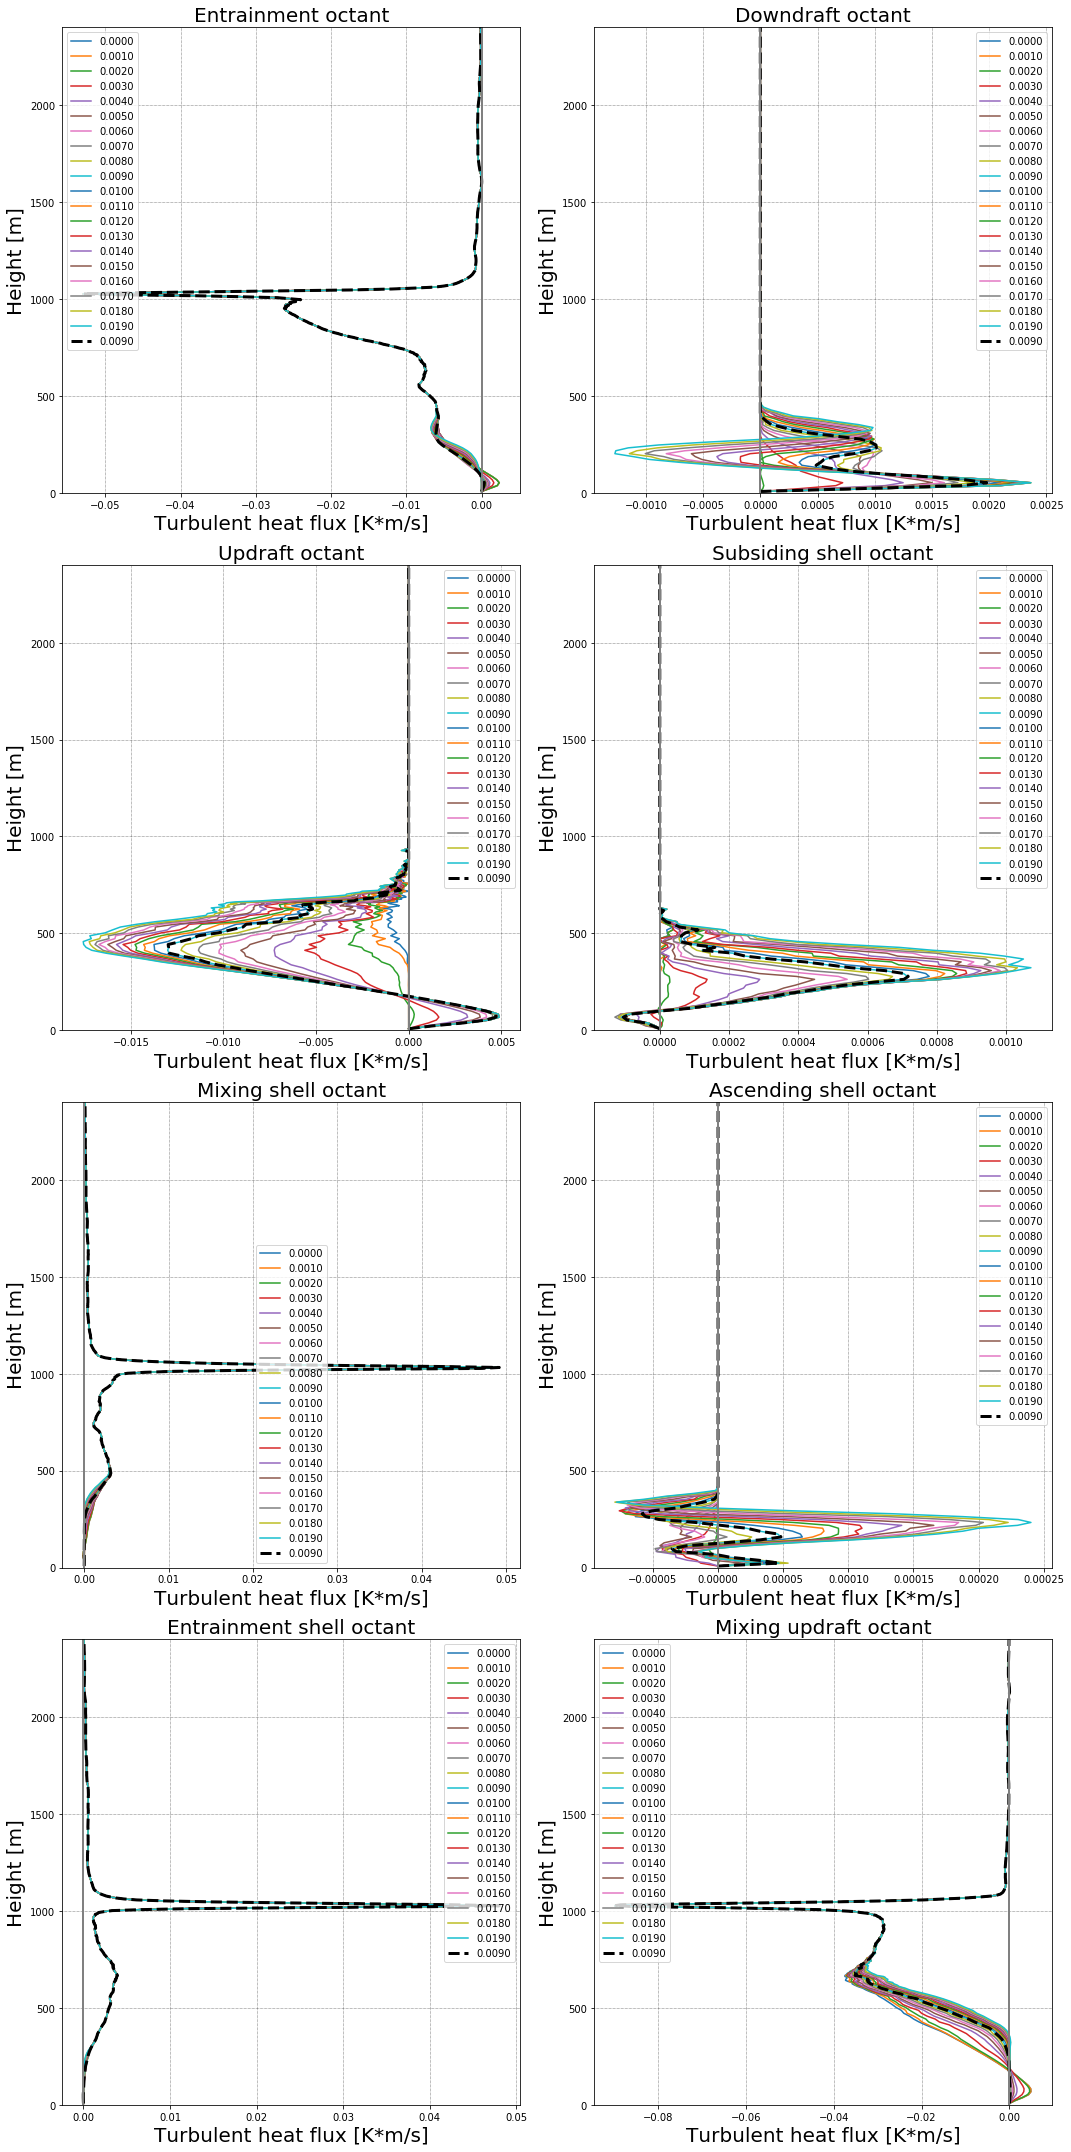

In [676]:
# Only for DD and EN with LCL height and zi plotted
thre = np.linspace(0,19,20) * 0.001
thre_label = ['%.4f'%(thre[i]) for i in range(20) ]
fig, axs = plt.subplots(4, 2, figsize=(15,30))
ax = plt.subplot(421)
for i in range(aim):
    plt.plot(EN_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(EN_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Entrainment octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(422)
for i in range(aim):
    plt.plot(DD_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(DD_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Downdraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(423)
for i in range(aim):
    plt.plot(UU_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(UU_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Updraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(424)
for i in range(aim):
    plt.plot(SS_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(SS_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Subsiding shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(425)
for i in range(aim):
    plt.plot(MS_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(MS_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Mixing shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(426)
for i in range(aim):
    plt.plot(AS_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(AS_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Ascending shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(427)
for i in range(aim):
    plt.plot(ES_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(ES_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Entrainment shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(428)
for i in range(aim):
    plt.plot(MU_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(MU_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Mixing updraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
fig.tight_layout()
plt.savefig('diff_all.eps')

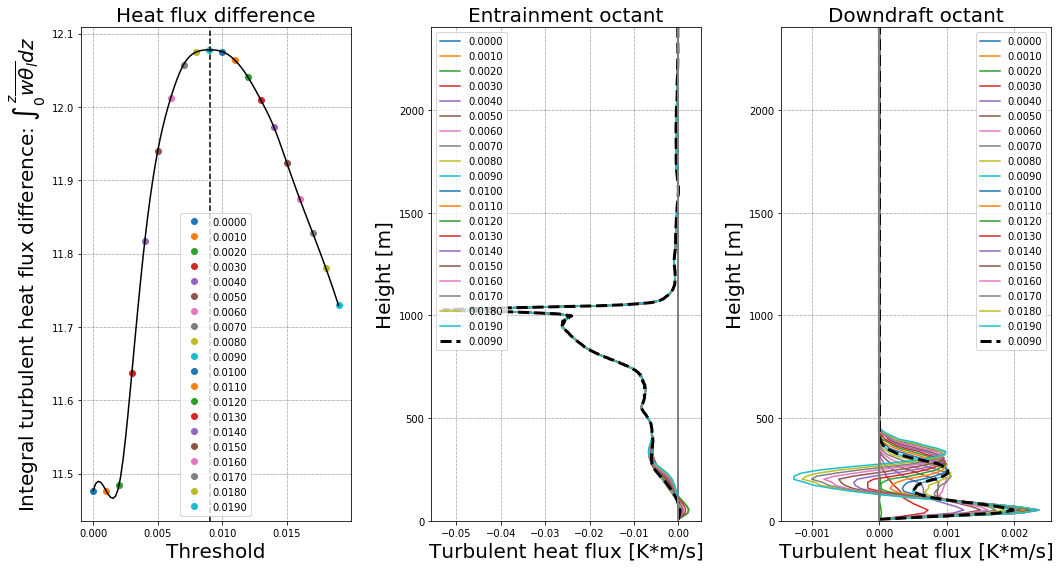

In [677]:
# Only for DD and EN with LCL height and zi plotted
thre = np.linspace(0,19,20) * 0.001
thre_label = ['%.4f'%(thre[i]) for i in range(20) ]
fig, axs = plt.subplots(1, 3, figsize=(15,8))


ax = plt.subplot(131)
for i in range(aim):
    plt.plot(thre[i], DD_int[i] - EN_int[i],'o', label=thre_label[i],linewidth = 1.5)
    
plt.plot(xnew, DDEN(xnew),color='k')
plt.xlabel('Threshold',fontsize=20)
plt.title('Heat flux difference',fontsize=20)
plt.axvline(x=xnew[DDEN_max],color='k', linestyle='--')
plt.ylabel('Integral turbulent heat flux difference: $\int^{z}_0{\overline{w\\theta_l}dz}$',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
ax = plt.subplot(132)
for i in range(aim):
    plt.plot(EN_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)

plt.plot(EN_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Entrainment octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(133)
for i in range(aim):
    plt.plot(DD_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)

plt.plot(DD_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Downdraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
fig.tight_layout()
plt.savefig('diff.eps')

In [572]:
qflx = np.zeros(zp)
hflx = np.zeros(zp)
for z_index in range(zp):
    qflx[z_index] = np.mean(qtp[z_index,:,:] * wp[z_index,:,:])
    hflx[z_index] = np.mean(thlp[z_index,:,:] * wp[z_index,:,:])

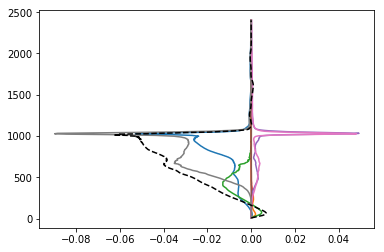

In [678]:
plt.plot(EN_flxm_new,z,label = 'Entrainment',linewidth = 1.5)
plt.plot(DD_flxm_new,z,label = 'Downdraft',linewidth = 1.5)
plt.plot(UU_flxm_new,z,label = 'Updraft',linewidth = 1.5)
plt.plot(SS_flxm_new,z,label = 'Subsiding shell',linewidth = 1.5)
plt.plot(MS_flxm_new,z,label = 'Mixing shell',linewidth = 1.5)
plt.plot(AS_flxm_new,z,label = 'Acsending shell',linewidth = 1.5)
plt.plot(ES_flxm_new,z,label = 'Entrainment shell',linewidth = 1.5)
plt.plot(MU_flxm_new,z,label = 'Mixing updraft',linewidth = 1.5)
plt.plot(hflx,z,'--',color='black',linewidth = 1.5)
#plt.legend()
plt.savefig('3231.eps')

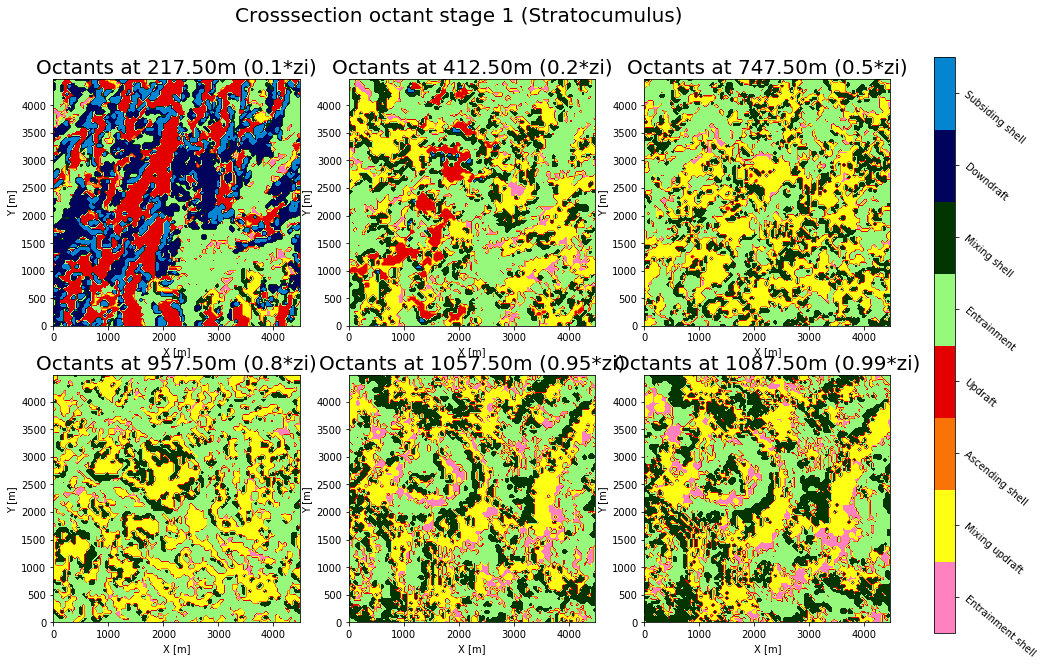

In [679]:
# Cross-section contourf
fig, axs = plt.subplots(2, 3,figsize=(15,10))
plt.suptitle('Crosssection octant stage 1 (Stratocumulus)',fontsize=20)
ax = plt.subplot(231)
Percent_zi = 0.1
z_index = round(zi_ql_index * Percent_zi)
cs = plt.contourf(xxx,yyy,octant_new[z_index,:,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Octants at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xlabel('X [m]',fontsize=10)
plt.ylabel('Y [m]',fontsize=10)
ax = plt.subplot(232)
Percent_zi = 0.2
z_index = round(zi_ql_index * Percent_zi)
cs = plt.contourf(xxx,yyy,octant_new[z_index,:,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Octants at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xlabel('X [m]',fontsize=10)
plt.ylabel('Y [m]',fontsize=10)
ax = plt.subplot(233)
Percent_zi = 0.5
z_index = round(zi_ql_index * Percent_zi)
cs = plt.contourf(xxx,yyy,octant_new[z_index,:,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Octants at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xlabel('X [m]',fontsize=10)
plt.ylabel('Y [m]',fontsize=10)
ax = plt.subplot(234)
Percent_zi = 0.8
z_index = round(zi_ql_index * Percent_zi)
cs = plt.contourf(xxx,yyy,octant_new[z_index,:,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Octants at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xlabel('X [m]',fontsize=10)
plt.ylabel('Y [m]',fontsize=10)
ax = plt.subplot(235)
Percent_zi = 0.95
z_index = round(zi_ql_index * Percent_zi)
cs = plt.contourf(xxx,yyy,octant_new[z_index,:,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Octants at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xlabel('X [m]',fontsize=10)
plt.ylabel('Y [m]',fontsize=10)
ax = plt.subplot(236)
Percent_zi = 0.99
z_index = round(zi_ql_index * Percent_zi)
cs = plt.contourf(xxx,yyy,octant_new[z_index,:,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Octants at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xlabel('X [m]',fontsize=10)
plt.ylabel('Y [m]',fontsize=10)
cbar_ax = fig.add_axes([0.94, 0.11, 0.02, 0.8])
# [posit.left/right,posit.up/down,size_width,size_length] adjust corespondingly
cbar = fig.colorbar(cs,cax=cbar_ax,ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
cbar.ax.set_yticklabels(['Entrainment shell', 'Mixing updraft', 'Ascending shell', 'Updraft', 'Entrainment'
                        ,'Mixing shell', 'Downdraft', 'Subsiding shell'], rotation = -40)  # vertically oriented colorbar

plt.savefig('cross_1.eps')

In [680]:
# Collect value for each octant runs superlong!
# eg. Octant_UU[qt,ql,thl,u,v,w,TKE,thv,z] n for count, add buoy when operating on real data
# Initialize values    8294400 total for 400*144*144
octant_EN = np.zeros([3000000,9])
octant_DD = np.zeros([3000000,9])
octant_MU = np.zeros([3000000,9])
octant_AS = np.zeros([3000000,9])
octant_UU = np.zeros([3000000,9])
octant_ES = np.zeros([3000000,9])
octant_MS = np.zeros([3000000,9])
octant_SS = np.zeros([3000000,9])
# Loop over the whole domain
i_ES = np.zeros(zp)
i_MU = np.zeros(zp)
i_AS = np.zeros(zp)
i_UU = np.zeros(zp)
i_EN = np.zeros(zp)
i_MS = np.zeros(zp)
i_DD = np.zeros(zp)
i_SS = np.zeros(zp)
i_ES_count = 0
i_MU_count = 0
i_AS_count = 0
i_UU_count = 0
i_EN_count = 0
i_MS_count = 0
i_DD_count = 0
i_SS_count = 0
for z_index in range(zp):
    for x_index in range(xp):
        for y_index in range(yp):
            pt = [[z_index],[x_index],[y_index]] # shorten the code
            if octant_new[pt] == 1:# Entrainment shell
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_ES[i_ES_count,:] = temp
                i_ES[z_index] += 1
                i_ES_count += 1
            if octant_new[pt] == 2:# Mixing updraft
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_MU[i_MU_count,:] = temp
                i_MU[z_index] += 1
                i_MU_count += 1
            if octant_new[pt] == 3:# Ascending shell
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_AS[i_AS_count,:] = temp
                i_AS[z_index] += 1
                i_AS_count += 1
            if octant_new[pt] == 4:# Updraft
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_UU[i_UU_count,:] = temp
                i_UU[z_index] += 1
                i_UU_count += 1
            if octant_new[pt] == 5:# Entrainment
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_EN[i_EN_count,:] = temp
                i_EN[z_index] += 1
                i_EN_count += 1
            if octant_new[pt] == 6:# Mixing shell
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_MS[i_MS_count,:] = temp
                i_MS[z_index] += 1
                i_MS_count += 1
            if octant_new[pt] == 7:# Downdrafts
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_DD[i_DD_count,:] = temp
                i_DD[z_index] += 1
                i_DD_count += 1
            if octant_new[pt] == 8:# Subsiding shell
                temp = [qttemp[pt],qltemp[pt],thltemp[pt],utemp[pt],vtemp[pt],wtemp[pt],TKE[pt],thv[pt],z_index]
                octant_SS[i_SS_count,:] = temp
                i_SS[z_index] += 1
                i_SS_count += 1
IPython.display.display(horse)                

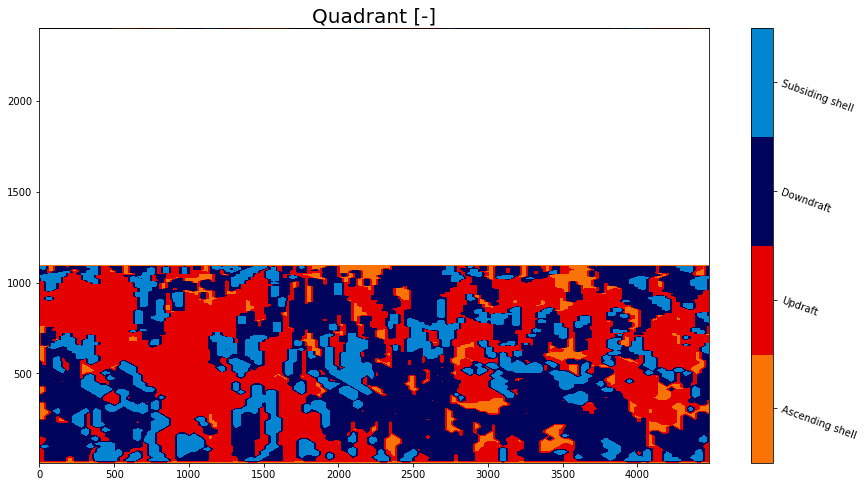

In [690]:
# Quadrant analysis
quad = np.zeros([zp,xp,yp],dtype = int) - 1e-12 # Little hack to get a usable colorbar
for x_index in range(xp):
    for y_index in range(yp):
        for z_index in range(zp):
            
            if (SBLp[z_index,x_index,y_index] < 0 and # Updraft
                wp[z_index,x_index,y_index] > 0   and
                SFTstar[z_index,x_index,y_index] != 0):
                quad[z_index,x_index,y_index] = 2
                
            if (SBLp[z_index,x_index,y_index] > 0 and # Downdraft
                wp[z_index,x_index,y_index] < 0   and
                SFTstar[z_index,x_index,y_index] != 0):
                quad[z_index,x_index,y_index] = 3
                
            if (SBLp[z_index,x_index,y_index] > 0 and # Ascending shell
                wp[z_index,x_index,y_index] > 0   and
                SFTstar[z_index,x_index,y_index] != 0):
                quad[z_index,x_index,y_index] = 1
                
            if (SBLp[z_index,x_index,y_index] < 0 and # Subsiding shell 
                wp[z_index,x_index,y_index] < 0   and
                SFTstar[z_index,x_index,y_index] != 0):
                quad[z_index,x_index,y_index] = 4

slice_index = 43
fig = plt.figure(figsize = (15,8))
levels = np.arange(0, 5, 1)
quad[zi_ql_index:-1,:,:] = - 1e-12
cs = plt.contourf(xx,zz,quad[:,slice_index,:], cmap = cmap_quadrant, levels = levels)
plt.title('Quadrant [-]',fontsize = 20)  
cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels(['Ascending shell','Updraft', 'Downdraft', 
                         'Subsiding shell'], rotation = -20)  # vertically oriented colorbar
plt.savefig('quad.eps')

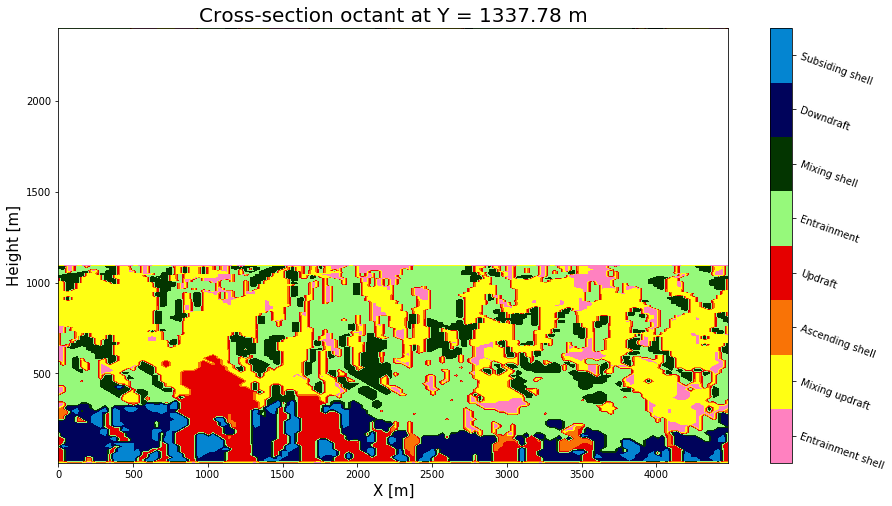

In [681]:
slice_index = 43
slice_position = slice_index * 4480/xp
fig = plt.figure(figsize = (15,8))
octant_new[zi_ql_index:-1,:,:] = - 1e-12
cs = plt.contourf(xx,zz,octant_new[:,slice_index,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Cross-section octant at Y = %.2f m'%slice_position,fontsize = 20)
cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
cbar.ax.set_yticklabels(['Entrainment shell', 'Mixing updraft', 'Ascending shell', 'Updraft', 'Entrainment'
                        ,'Mixing shell', 'Downdraft', 'Subsiding shell'], rotation = -20)  # vertically oriented colorbar
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Height [m]',fontsize=15)
plt.savefig('oct.eps')

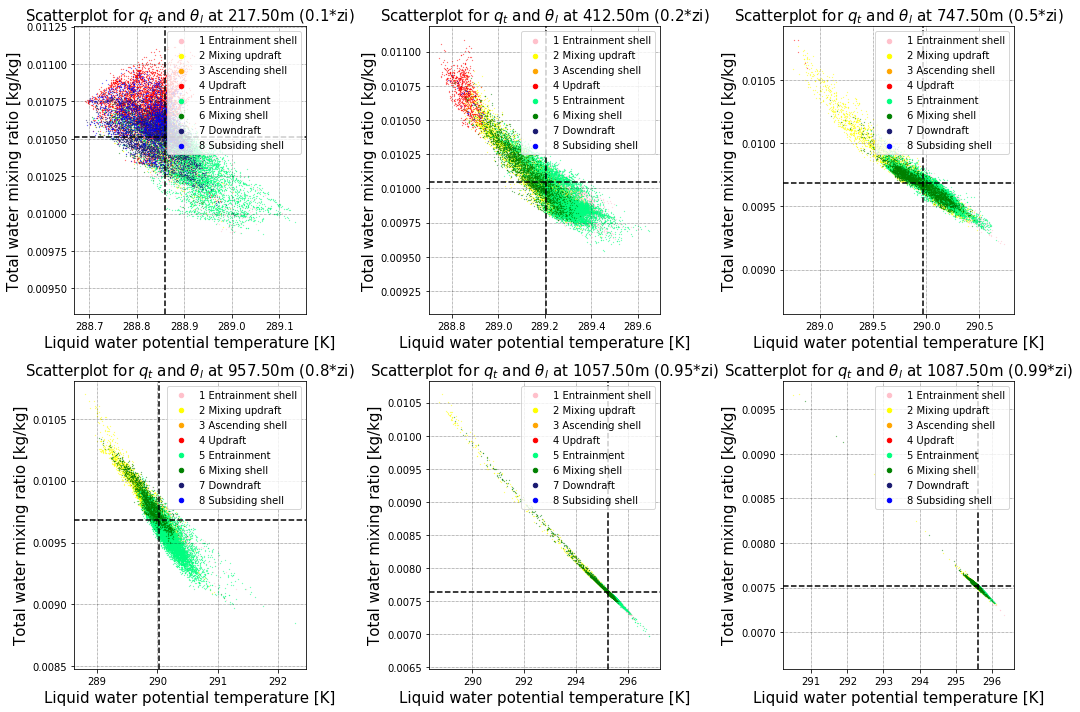

In [682]:
# Overlapping octant together for different ratio of inversion height with scatter plot
fig, axs = plt.subplots(2, 3,figsize = (15,10))
dot_size = 0.05
# 0.3 0.35 0.6 0.8  0.99
# qt,ql,thl,u,v,w,TKE,thv,z
colors = itertools.cycle(["pink","yellow","orange","red","springgreen","green","midnightblue",'blue'])
ax = plt.subplot(231)
Percent_zi = 0.1
z_index = round(zi_ql_index * Percent_zi)
indexes = [i for i,x in enumerate(octant_ES[...,8]) if x == z_index] # Match the height
plt.scatter(octant_ES[indexes,2], octant_ES[indexes,0],s = dot_size, color=next(colors),label='1 Entrainment shell')
indexes = [i for i,x in enumerate(octant_MU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MU[indexes,2], octant_MU[indexes,0],s = dot_size, color=next(colors),label='2 Mixing updraft')
indexes = [i for i,x in enumerate(octant_AS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_AS[indexes,2], octant_AS[indexes,0],s = dot_size, color=next(colors),label='3 Ascending shell')
indexes = [i for i,x in enumerate(octant_UU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_UU[indexes,2], octant_UU[indexes,0],s = dot_size, color=next(colors),label='4 Updraft')
indexes = [i for i,x in enumerate(octant_EN[...,8]) if x == z_index] # Match the height
plt.scatter(octant_EN[indexes,2], octant_EN[indexes,0],s = dot_size, color=next(colors),label='5 Entrainment')
indexes = [i for i,x in enumerate(octant_MS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MS[indexes,2], octant_MS[indexes,0],s = dot_size, color=next(colors),label='6 Mixing shell')
indexes = [i for i,x in enumerate(octant_DD[...,8]) if x == z_index] # Match the height
plt.scatter(octant_DD[indexes,2], octant_DD[indexes,0],s = dot_size, color=next(colors),label='7 Downdraft')
indexes = [i for i,x in enumerate(octant_SS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_SS[indexes,2], octant_SS[indexes,0],s = dot_size, color=next(colors),label='8 Subsiding shell')
ax.set_title('Scatterplot for $q_t$ and $\\theta_l$ at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.axvline(x = thl_avg[z_index],color='k', linestyle='--')
plt.axhline(y = qt_avg[z_index],color='k', linestyle='--')
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(232)
Percent_zi = 0.2
z_index = round(zi_ql_index * Percent_zi)
indexes = [i for i,x in enumerate(octant_ES[...,8]) if x == z_index] # Match the height
plt.scatter(octant_ES[indexes,2], octant_ES[indexes,0],s = dot_size, color=next(colors),label='1 Entrainment shell')
indexes = [i for i,x in enumerate(octant_MU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MU[indexes,2], octant_MU[indexes,0],s = dot_size, color=next(colors),label='2 Mixing updraft')
indexes = [i for i,x in enumerate(octant_AS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_AS[indexes,2], octant_AS[indexes,0],s = dot_size, color=next(colors),label='3 Ascending shell')
indexes = [i for i,x in enumerate(octant_UU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_UU[indexes,2], octant_UU[indexes,0],s = dot_size, color=next(colors),label='4 Updraft')
indexes = [i for i,x in enumerate(octant_EN[...,8]) if x == z_index] # Match the height
plt.scatter(octant_EN[indexes,2], octant_EN[indexes,0],s = dot_size, color=next(colors),label='5 Entrainment')
indexes = [i for i,x in enumerate(octant_MS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MS[indexes,2], octant_MS[indexes,0],s = dot_size, color=next(colors),label='6 Mixing shell')
indexes = [i for i,x in enumerate(octant_DD[...,8]) if x == z_index] # Match the height
plt.scatter(octant_DD[indexes,2], octant_DD[indexes,0],s = dot_size, color=next(colors),label='7 Downdraft')
indexes = [i for i,x in enumerate(octant_SS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_SS[indexes,2], octant_SS[indexes,0],s = dot_size, color=next(colors),label='8 Subsiding shell')
ax.set_title('Scatterplot for $q_t$ and $\\theta_l$ at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.axvline(x = thl_avg[z_index],color='k', linestyle='--')
plt.axhline(y = qt_avg[z_index],color='k', linestyle='--')
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(233)
Percent_zi = 0.5
z_index = round(zi_ql_index * Percent_zi)
indexes = [i for i,x in enumerate(octant_ES[...,8]) if x == z_index] # Match the height
plt.scatter(octant_ES[indexes,2], octant_ES[indexes,0],s = dot_size, color=next(colors),label='1 Entrainment shell')
indexes = [i for i,x in enumerate(octant_MU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MU[indexes,2], octant_MU[indexes,0],s = dot_size, color=next(colors),label='2 Mixing updraft')
indexes = [i for i,x in enumerate(octant_AS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_AS[indexes,2], octant_AS[indexes,0],s = dot_size, color=next(colors),label='3 Ascending shell')
indexes = [i for i,x in enumerate(octant_UU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_UU[indexes,2], octant_UU[indexes,0],s = dot_size, color=next(colors),label='4 Updraft')
indexes = [i for i,x in enumerate(octant_EN[...,8]) if x == z_index] # Match the height
plt.scatter(octant_EN[indexes,2], octant_EN[indexes,0],s = dot_size, color=next(colors),label='5 Entrainment')
indexes = [i for i,x in enumerate(octant_MS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MS[indexes,2], octant_MS[indexes,0],s = dot_size, color=next(colors),label='6 Mixing shell')
indexes = [i for i,x in enumerate(octant_DD[...,8]) if x == z_index] # Match the height
plt.scatter(octant_DD[indexes,2], octant_DD[indexes,0],s = dot_size, color=next(colors),label='7 Downdraft')
indexes = [i for i,x in enumerate(octant_SS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_SS[indexes,2], octant_SS[indexes,0],s = dot_size, color=next(colors),label='8 Subsiding shell')
ax.set_title('Scatterplot for $q_t$ and $\\theta_l$ at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.axvline(x = thl_avg[z_index],color='k', linestyle='--')
plt.axhline(y = qt_avg[z_index],color='k', linestyle='--')
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(234)
Percent_zi = 0.8
z_index = round(zi_ql_index * Percent_zi)
indexes = [i for i,x in enumerate(octant_ES[...,8]) if x == z_index] # Match the height
plt.scatter(octant_ES[indexes,2], octant_ES[indexes,0],s = dot_size, color=next(colors),label='1 Entrainment shell')
indexes = [i for i,x in enumerate(octant_MU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MU[indexes,2], octant_MU[indexes,0],s = dot_size, color=next(colors),label='2 Mixing updraft')
indexes = [i for i,x in enumerate(octant_AS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_AS[indexes,2], octant_AS[indexes,0],s = dot_size, color=next(colors),label='3 Ascending shell')
indexes = [i for i,x in enumerate(octant_UU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_UU[indexes,2], octant_UU[indexes,0],s = dot_size, color=next(colors),label='4 Updraft')
indexes = [i for i,x in enumerate(octant_EN[...,8]) if x == z_index] # Match the height
plt.scatter(octant_EN[indexes,2], octant_EN[indexes,0],s = dot_size, color=next(colors),label='5 Entrainment')
indexes = [i for i,x in enumerate(octant_MS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MS[indexes,2], octant_MS[indexes,0],s = dot_size, color=next(colors),label='6 Mixing shell')
indexes = [i for i,x in enumerate(octant_DD[...,8]) if x == z_index] # Match the height
plt.scatter(octant_DD[indexes,2], octant_DD[indexes,0],s = dot_size, color=next(colors),label='7 Downdraft')
indexes = [i for i,x in enumerate(octant_SS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_SS[indexes,2], octant_SS[indexes,0],s = dot_size, color=next(colors),label='8 Subsiding shell')
ax.set_title('Scatterplot for $q_t$ and $\\theta_l$ at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.axvline(x = thl_avg[z_index],color='k', linestyle='--')
plt.axhline(y = qt_avg[z_index],color='k', linestyle='--')
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(235)
Percent_zi = 0.95
z_index = round(zi_ql_index * Percent_zi)
indexes = [i for i,x in enumerate(octant_ES[...,8]) if x == z_index] # Match the height
plt.scatter(octant_ES[indexes,2], octant_ES[indexes,0],s = dot_size, color=next(colors),label='1 Entrainment shell')
indexes = [i for i,x in enumerate(octant_MU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MU[indexes,2], octant_MU[indexes,0],s = dot_size, color=next(colors),label='2 Mixing updraft')
indexes = [i for i,x in enumerate(octant_AS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_AS[indexes,2], octant_AS[indexes,0],s = dot_size, color=next(colors),label='3 Ascending shell')
indexes = [i for i,x in enumerate(octant_UU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_UU[indexes,2], octant_UU[indexes,0],s = dot_size, color=next(colors),label='4 Updraft')
indexes = [i for i,x in enumerate(octant_EN[...,8]) if x == z_index] # Match the height
plt.scatter(octant_EN[indexes,2], octant_EN[indexes,0],s = dot_size, color=next(colors),label='5 Entrainment')
indexes = [i for i,x in enumerate(octant_MS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MS[indexes,2], octant_MS[indexes,0],s = dot_size, color=next(colors),label='6 Mixing shell')
indexes = [i for i,x in enumerate(octant_DD[...,8]) if x == z_index] # Match the height
plt.scatter(octant_DD[indexes,2], octant_DD[indexes,0],s = dot_size, color=next(colors),label='7 Downdraft')
indexes = [i for i,x in enumerate(octant_SS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_SS[indexes,2], octant_SS[indexes,0],s = dot_size, color=next(colors),label='8 Subsiding shell')
ax.set_title('Scatterplot for $q_t$ and $\\theta_l$ at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.axvline(x = thl_avg[z_index],color='k', linestyle='--')
plt.axhline(y = qt_avg[z_index],color='k', linestyle='--')
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(236)
Percent_zi = 0.99
z_index = round(zi_ql_index * Percent_zi)
indexes = [i for i,x in enumerate(octant_ES[...,8]) if x == z_index] # Match the height
plt.scatter(octant_ES[indexes,2], octant_ES[indexes,0],s = dot_size, color=next(colors),label='1 Entrainment shell')
indexes = [i for i,x in enumerate(octant_MU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MU[indexes,2], octant_MU[indexes,0],s = dot_size, color=next(colors),label='2 Mixing updraft')
indexes = [i for i,x in enumerate(octant_AS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_AS[indexes,2], octant_AS[indexes,0],s = dot_size, color=next(colors),label='3 Ascending shell')
indexes = [i for i,x in enumerate(octant_UU[...,8]) if x == z_index] # Match the height
plt.scatter(octant_UU[indexes,2], octant_UU[indexes,0],s = dot_size, color=next(colors),label='4 Updraft')
indexes = [i for i,x in enumerate(octant_EN[...,8]) if x == z_index] # Match the height
plt.scatter(octant_EN[indexes,2], octant_EN[indexes,0],s = dot_size, color=next(colors),label='5 Entrainment')
indexes = [i for i,x in enumerate(octant_MS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_MS[indexes,2], octant_MS[indexes,0],s = dot_size, color=next(colors),label='6 Mixing shell')
indexes = [i for i,x in enumerate(octant_DD[...,8]) if x == z_index] # Match the height
plt.scatter(octant_DD[indexes,2], octant_DD[indexes,0],s = dot_size, color=next(colors),label='7 Downdraft')
indexes = [i for i,x in enumerate(octant_SS[...,8]) if x == z_index] # Match the height
plt.scatter(octant_SS[indexes,2], octant_SS[indexes,0],s = dot_size, color=next(colors),label='8 Subsiding shell')
ax.set_title('Scatterplot for $q_t$ and $\\theta_l$ at %.2fm (%s*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
plt.axvline(x = thl_avg[z_index],color='k', linestyle='--')
plt.axhline(y = qt_avg[z_index],color='k', linestyle='--')
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
fig.tight_layout()
plt.savefig('oct_scatter.eps')

In [683]:
# Calculate the slab average and flux for each octant
EN_qt_avg = np.zeros(zp) + np.nan # Add a NaN value to not show zero point
MU_qt_avg = np.zeros(zp) + np.nan 
AS_qt_avg = np.zeros(zp) + np.nan
UU_qt_avg = np.zeros(zp) + np.nan
ES_qt_avg = np.zeros(zp) + np.nan
MS_qt_avg = np.zeros(zp) + np.nan
DD_qt_avg = np.zeros(zp) + np.nan
SS_qt_avg = np.zeros(zp) + np.nan

EN_thl_avg = np.zeros(zp) + np.nan
MU_thl_avg = np.zeros(zp) + np.nan
AS_thl_avg = np.zeros(zp) + np.nan
UU_thl_avg = np.zeros(zp) + np.nan
ES_thl_avg = np.zeros(zp) + np.nan
MS_thl_avg = np.zeros(zp) + np.nan
DD_thl_avg = np.zeros(zp) + np.nan
SS_thl_avg = np.zeros(zp) + np.nan

EN_TKE_avg = np.zeros(zp) + np.nan
MU_TKE_avg = np.zeros(zp) + np.nan
AS_TKE_avg = np.zeros(zp) + np.nan
UU_TKE_avg = np.zeros(zp) + np.nan
ES_TKE_avg = np.zeros(zp) + np.nan
MS_TKE_avg = np.zeros(zp) + np.nan
DD_TKE_avg = np.zeros(zp) + np.nan
SS_TKE_avg = np.zeros(zp) + np.nan

EN_w_avg = np.zeros(zp) + np.nan
MU_w_avg = np.zeros(zp) + np.nan
AS_w_avg = np.zeros(zp) + np.nan
UU_w_avg = np.zeros(zp) + np.nan
ES_w_avg = np.zeros(zp) + np.nan
MS_w_avg = np.zeros(zp) + np.nan
DD_w_avg = np.zeros(zp) + np.nan
SS_w_avg = np.zeros(zp) + np.nan

EN_ql_avg = np.zeros(zp) + np.nan
MU_ql_avg = np.zeros(zp) + np.nan
AS_ql_avg = np.zeros(zp) + np.nan
UU_ql_avg = np.zeros(zp) + np.nan
ES_ql_avg = np.zeros(zp) + np.nan
MS_ql_avg = np.zeros(zp) + np.nan
DD_ql_avg = np.zeros(zp) + np.nan
SS_ql_avg = np.zeros(zp) + np.nan

EN_hflx_avg = np.zeros(zp) 
MU_hflx_avg = np.zeros(zp)
AS_hflx_avg = np.zeros(zp)
UU_hflx_avg = np.zeros(zp)
ES_hflx_avg = np.zeros(zp) 
MS_hflx_avg = np.zeros(zp) 
DD_hflx_avg = np.zeros(zp)
SS_hflx_avg = np.zeros(zp)

EN_qflx_avg = np.zeros(zp) 
MU_qflx_avg = np.zeros(zp) 
AS_qflx_avg = np.zeros(zp) 
UU_qflx_avg = np.zeros(zp) 
ES_qflx_avg = np.zeros(zp) 
MS_qflx_avg = np.zeros(zp) 
DD_qflx_avg = np.zeros(zp) 
SS_qflx_avg = np.zeros(zp) 

ENtemp = 0
DDtemp = 0
UUtemp = 0
MUtemp = 0
EStemp = 0
SStemp = 0
MStemp = 0
AStemp = 0

# qt,ql,thl,u,v,w,TKE,thv,z
for z_index in range(zp):
    if (i_EN[z_index] != 0):
        EN_qt_avg[z_index] = np.mean(octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),0])
        EN_ql_avg[z_index] = np.mean(octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),1])
        EN_thl_avg[z_index] = np.mean(octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),2])
        EN_TKE_avg[z_index] = np.mean(octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),6])
        EN_w_avg[z_index] = np.mean(octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),5])
        EN_hflx_avg[z_index] = np.sum((octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),2] - thl_avg[z_index]) * (octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),5] - w_avg[z_index])) / slab_count
        EN_qflx_avg[z_index] = np.sum((octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),0] - qt_avg[z_index]) * (octant_EN[ENtemp:int(ENtemp + i_EN[z_index]),5] - w_avg[z_index])) / slab_count
        ENtemp = int(ENtemp + i_EN[z_index])
        
    if (i_DD[z_index] != 0):
        DD_qt_avg[z_index] = np.mean(octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),0])
        DD_ql_avg[z_index] = np.mean(octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),1])
        DD_thl_avg[z_index] = np.mean(octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),2])
        DD_TKE_avg[z_index] = np.mean(octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),6])
        DD_w_avg[z_index] = np.mean(octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),5])
        DD_hflx_avg[z_index] = np.sum((octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),2] - thl_avg[z_index]) * (octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),5] - w_avg[z_index])) / slab_count
        DD_qflx_avg[z_index] = np.sum((octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),0] - qt_avg[z_index]) * (octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),5] - w_avg[z_index])) / slab_count
        DDtemp = int(DDtemp + i_DD[z_index])
        
    if (i_UU[z_index] != 0):
        UU_qt_avg[z_index] = np.mean(octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),0])
        UU_ql_avg[z_index] = np.mean(octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),1])
        UU_thl_avg[z_index] = np.mean(octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),2])
        UU_TKE_avg[z_index] = np.mean(octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),6])
        UU_w_avg[z_index] =   np.mean(octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),5])
        UU_hflx_avg[z_index] = np.sum((octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),2] - thl_avg[z_index]) * (octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),5] - w_avg[z_index])) / slab_count
        UU_qflx_avg[z_index] = np.sum((octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),0] - qt_avg[z_index]) * (octant_UU[UUtemp:int(UUtemp + i_UU[z_index]),5] - w_avg[z_index])) / slab_count
        UUtemp = int(UUtemp + i_UU[z_index])
        
    if (i_MU[z_index] != 0):
        MU_qt_avg[z_index] = np.mean(octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),0])
        MU_ql_avg[z_index] = np.mean(octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),1])
        MU_thl_avg[z_index] = np.mean(octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),2])
        MU_TKE_avg[z_index] = np.mean(octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),6])
        MU_w_avg[z_index] = np.mean(octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),5])
        MU_hflx_avg[z_index] = np.sum((octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),2] - thl_avg[z_index]) * (octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),5] - w_avg[z_index])) / slab_count
        MU_qflx_avg[z_index] = np.sum((octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),0] - qt_avg[z_index]) * (octant_MU[MUtemp:int(MUtemp + i_MU[z_index]),5] - w_avg[z_index])) / slab_count
        MUtemp = int(MUtemp + i_MU[z_index])
        
    if (i_ES[z_index] != 0):
        ES_qt_avg[z_index] = np.mean(octant_ES[EStemp:int(EStemp + i_ES[z_index]),0])
        ES_ql_avg[z_index] = np.mean(octant_ES[EStemp:int(EStemp + i_ES[z_index]),1])
        ES_thl_avg[z_index] = np.mean(octant_ES[EStemp:int(EStemp + i_ES[z_index]),2])
        ES_TKE_avg[z_index] = np.mean(octant_ES[EStemp:int(EStemp + i_ES[z_index]),6])
        ES_w_avg[z_index] = np.mean(octant_ES[EStemp:int(EStemp + i_ES[z_index]),5])
        ES_hflx_avg[z_index] = np.sum((octant_ES[EStemp:int(EStemp + i_ES[z_index]),2] - thl_avg[z_index]) * (octant_ES[EStemp:int(EStemp + i_ES[z_index]),5] - w_avg[z_index])) / slab_count
        ES_qflx_avg[z_index] = np.sum((octant_ES[EStemp:int(EStemp + i_ES[z_index]),0] - qt_avg[z_index]) * (octant_ES[EStemp:int(EStemp + i_ES[z_index]),5] - w_avg[z_index])) / slab_count
        EStemp = int(EStemp + i_ES[z_index])
        
    if (i_SS[z_index] != 0):
        SS_qt_avg[z_index] = np.mean(octant_SS[SStemp:int(SStemp + i_SS[z_index]),0])
        SS_ql_avg[z_index] = np.mean(octant_SS[SStemp:int(SStemp + i_SS[z_index]),1])
        SS_thl_avg[z_index] = np.mean(octant_SS[SStemp:int(SStemp + i_SS[z_index]),2])
        SS_TKE_avg[z_index] = np.mean(octant_SS[SStemp:int(SStemp + i_SS[z_index]),6])
        SS_w_avg[z_index] = np.mean(octant_SS[SStemp:int(SStemp + i_SS[z_index]),5])
        SS_hflx_avg[z_index] = np.sum((octant_SS[SStemp:int(SStemp + i_SS[z_index]),2] - thl_avg[z_index]) * (octant_SS[SStemp:int(SStemp + i_SS[z_index]),5] - w_avg[z_index])) / slab_count
        SS_qflx_avg[z_index] = np.sum((octant_SS[SStemp:int(SStemp + i_SS[z_index]),0] - qt_avg[z_index]) * (octant_SS[SStemp:int(SStemp + i_SS[z_index]),5] - w_avg[z_index])) / slab_count
        SStemp = int(SStemp + i_SS[z_index])
        
    if (i_MS[z_index] != 0):
        MS_qt_avg[z_index] = np.mean(octant_MS[MStemp:int(MStemp + i_MS[z_index]),0])
        MS_ql_avg[z_index] = np.mean(octant_MS[MStemp:int(MStemp + i_MS[z_index]),1])
        MS_thl_avg[z_index] = np.mean(octant_MS[MStemp:int(MStemp + i_MS[z_index]),2])
        MS_TKE_avg[z_index] = np.mean(octant_MS[MStemp:int(MStemp + i_MS[z_index]),6])
        MS_w_avg[z_index] = np.mean(octant_MS[MStemp:int(MStemp + i_MS[z_index]),5])
        MS_hflx_avg[z_index] = np.sum((octant_MS[MStemp:int(MStemp + i_MS[z_index]),2] - thl_avg[z_index]) * (octant_MS[MStemp:int(MStemp + i_MS[z_index]),5] - w_avg[z_index])) / slab_count
        MS_qflx_avg[z_index] = np.sum((octant_MS[MStemp:int(MStemp + i_MS[z_index]),0] - qt_avg[z_index]) * (octant_MS[MStemp:int(MStemp + i_MS[z_index]),5] - w_avg[z_index])) / slab_count
        MStemp = int(MStemp + i_MS[z_index])
        
    if (i_AS[z_index] != 0):
        AS_qt_avg[z_index] = np.mean(octant_AS[AStemp:int(AStemp + i_AS[z_index]),0])
        AS_ql_avg[z_index] = np.mean(octant_AS[AStemp:int(AStemp + i_AS[z_index]),1])
        AS_thl_avg[z_index] = np.mean(octant_AS[AStemp:int(AStemp + i_AS[z_index]),2])
        AS_TKE_avg[z_index] = np.mean(octant_AS[AStemp:int(AStemp + i_AS[z_index]),6])
        AS_w_avg[z_index] = np.mean(octant_AS[AStemp:int(AStemp + i_AS[z_index]),5])
        AS_hflx_avg[z_index] = np.sum((octant_AS[AStemp:int(AStemp + i_AS[z_index]),2] - thl_avg[z_index]) * (octant_AS[AStemp:int(AStemp + i_AS[z_index]),5] - w_avg[z_index])) / slab_count
        AS_qflx_avg[z_index] = np.sum((octant_AS[AStemp:int(AStemp + i_AS[z_index]),0] - qt_avg[z_index]) * (octant_AS[AStemp:int(AStemp + i_AS[z_index]),5] - w_avg[z_index])) / slab_count
        AStemp = int(AStemp + i_AS[z_index])
        
                                

In [660]:
DD_qflx_avg[z_index] = np.sum((octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),0] - qt_avg[z_index]) * (octant_DD[DDtemp:int(DDtemp + i_DD[z_index]),5] - w_avg[z_index]))

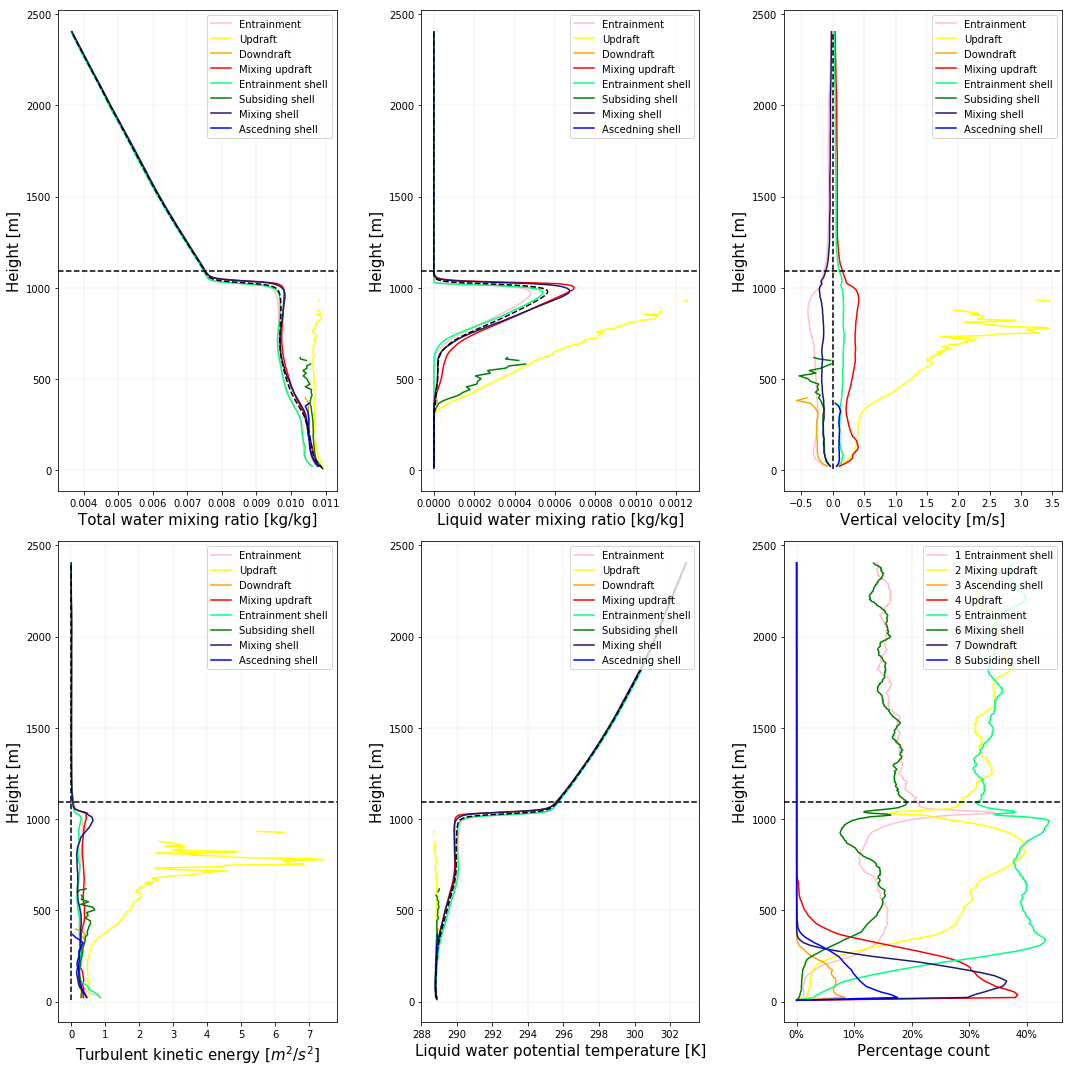

In [684]:
fig, axs = plt.subplots(3, 2,figsize = (15,15))
colors = itertools.cycle(["pink","yellow","orange","red","springgreen","green","midnightblue",'blue'])
gross_count = xp * yp
zt = 400
ax = plt.subplot(231)
plt.plot(EN_qt_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(UU_qt_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(DD_qt_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(MU_qt_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(ES_qt_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(SS_qt_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(MS_qt_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(AS_qt_avg[0:zt],z[0:zt],color=next(colors),label='Ascedning shell')
plt.plot(qt_avg[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
#plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = zi_ql,color='k', linestyle='--')
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Total water mixing ratio [kg/kg]',fontsize = 15)
lgnd = ax.legend(loc='upper right')
ax = plt.subplot(232)
plt.plot(EN_ql_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(UU_ql_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(DD_ql_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(MU_ql_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(ES_ql_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(SS_ql_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(MS_ql_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(AS_ql_avg[0:zt],z[0:zt],color=next(colors),label='Ascedning shell')
plt.plot(ql_avg[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
#plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = zi_ql,color='k', linestyle='--')
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Liquid water mixing ratio [kg/kg]',fontsize = 15)
lgnd = ax.legend(loc='upper right')
ax = plt.subplot(233)
plt.plot(EN_w_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(UU_w_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(DD_w_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(MU_w_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(ES_w_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(SS_w_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(MS_w_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(AS_w_avg[0:zt],z[0:zt],color=next(colors),label='Ascedning shell')
plt.plot(w_avg[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Vertical velocity [m/s]',fontsize = 15)
ax.grid(color = 'k', linewidth = 0.05)
#plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = zi_ql,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
ax = plt.subplot(234)
plt.plot(EN_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(UU_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(DD_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(MU_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(ES_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(SS_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(MS_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(AS_TKE_avg[0:zt],z[0:zt],color=next(colors),label='Ascedning shell')
plt.plot(TKE_avg[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Turbulent kinetic energy [$m^2/s^2$]',fontsize = 15)
#plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = zi_ql,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
ax = plt.subplot(235)
plt.plot(EN_thl_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(UU_thl_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(DD_thl_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(MU_thl_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(ES_thl_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(SS_thl_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(MS_thl_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(AS_thl_avg[0:zt],z[0:zt],color=next(colors),label='Ascedning shell')
plt.plot(thl_avg[0:zt],z[0:zt],'--',color = 'k')
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Liquid water potential temperature [K]',fontsize = 15)
ax.grid(color = 'k', linewidth = 0.05)
#plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = zi_ql,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
ax = plt.subplot(236)
plt.plot(ES_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='1 Entrainment shell')
plt.plot(MU_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='2 Mixing updraft')
plt.plot(AS_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='3 Ascending shell')
plt.plot(UU_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='4 Updraft')
plt.plot(EN_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='5 Entrainment')
plt.plot(MS_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='6 Mixing shell')
plt.plot(DD_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='7 Downdraft')
plt.plot(SS_count_new[0:zt]/gross_count,z[0:zt],color=next(colors),label='8 Subsiding shell')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
ax.set_xlabel('Percentage count',fontsize = 15)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
#plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = zi_ql,color='k', linestyle='--')
fig.tight_layout()
lgnd = ax.legend(loc='upper right')
plt.savefig('oct_slab.eps')

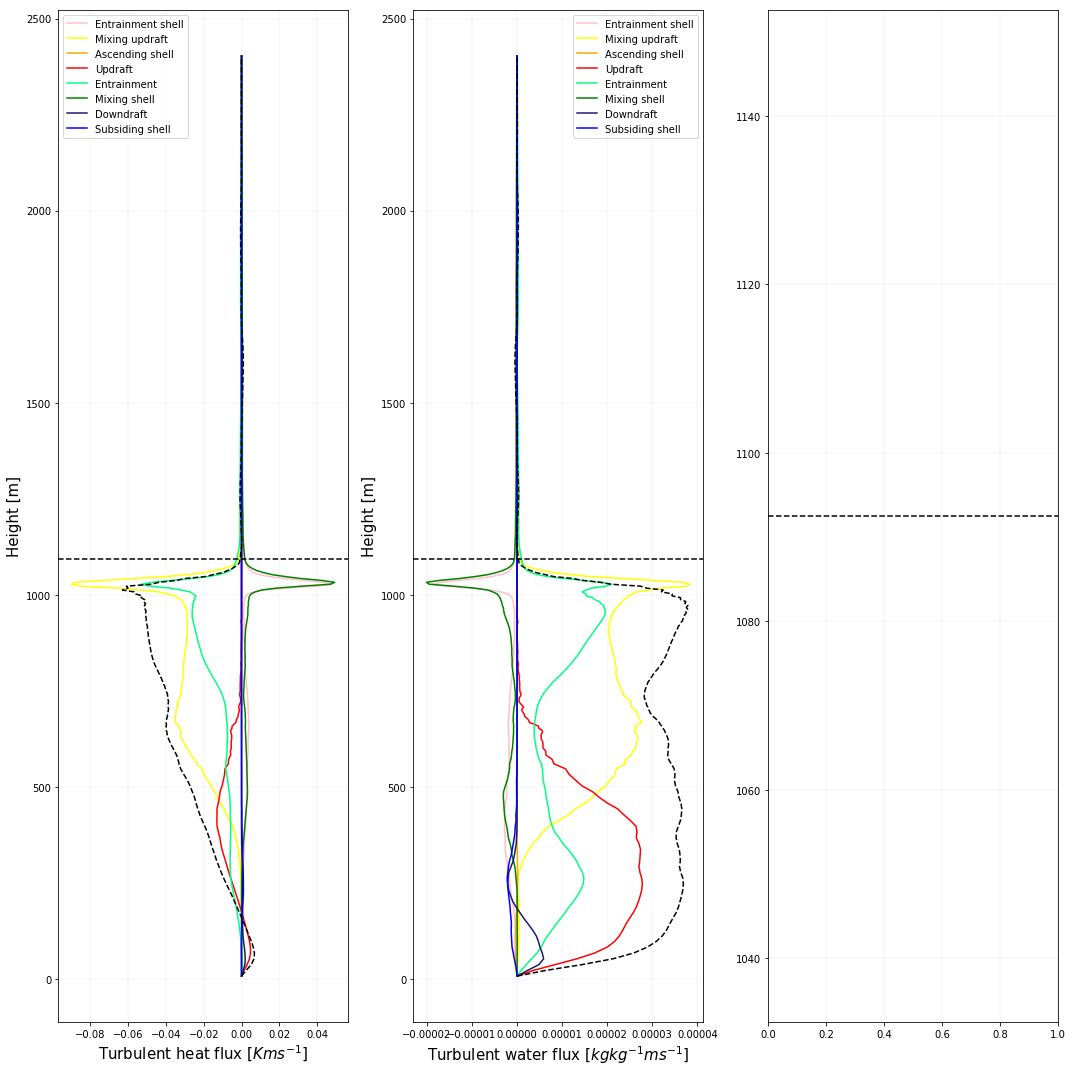

In [691]:
 # Show the horizontal mean turbulent flux heat/water flux
fig, axs = plt.subplots(1, 3,figsize = (15,15))
ax = plt.subplot(131)
plt.plot(ES_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(MU_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(AS_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Ascending shell')
plt.plot(UU_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(EN_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(MS_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(DD_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(SS_hflx_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(hflx[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Turbulent heat flux [$Kms^{-1}$]',fontsize = 15)
plt.axhline(y = zi_ql,color='k', linestyle='--')
plt.legend()
ax = plt.subplot(132)
plt.plot(ES_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment shell')
plt.plot(MU_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Mixing updraft')
plt.plot(AS_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Ascending shell')
plt.plot(UU_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Updraft')
plt.plot(EN_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Entrainment')
plt.plot(MS_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Mixing shell')
plt.plot(DD_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Downdraft')
plt.plot(SS_qflx_avg[0:zt],z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(qflx[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Turbulent water flux [$kgkg^{-1}ms^{-1}$]',fontsize = 15)
plt.axhline(y = zi_ql,color='k', linestyle='--')
plt.legend()
ax = plt.subplot(133)
plt.axhline(y = zi_ql,color='k', linestyle='--')
ax.grid(color = 'k', linewidth = 0.05)


fig.tight_layout()

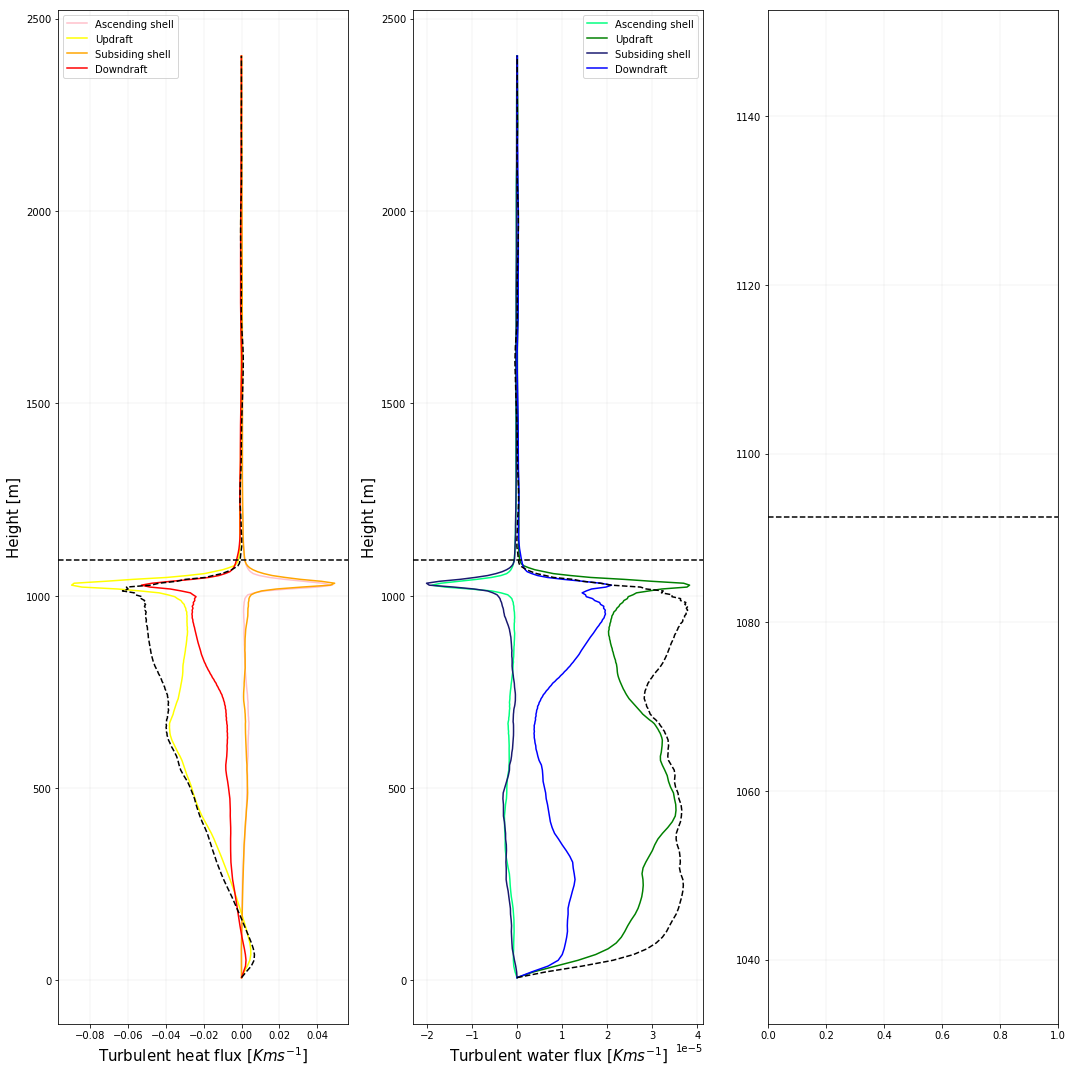

In [693]:
 # Show the horizontal mean turbulent flux heat/water flux !!!! QUAdrant
#DDEN = interp1d(thre, DD_int - EN_int, kind='cubic')
#ASES = interp1d(thre, AS_int - ES_int, kind='cubic')
#UUMU = interp1d(thre, UU_int - MU_int, kind='cubic')
#SSMS = interp1d(thre, SS_int - MS_int, kind='cubic')
fig, axs = plt.subplots(1, 3,figsize = (15,15))
ax = plt.subplot(131)
plt.plot(ES_hflx_avg+AS_hflx_avg,z[0:zt],color=next(colors),label='Ascending shell')
plt.plot(MU_hflx_avg+UU_hflx_avg,z[0:zt],color=next(colors),label='Updraft')
plt.plot(MS_hflx_avg+SS_hflx_avg,z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(DD_hflx_avg+EN_hflx_avg,z[0:zt],color=next(colors),label='Downdraft')

plt.plot(hflx[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Turbulent heat flux [$Kms^{-1}$]',fontsize = 15)
plt.axhline(y = zi_ql,color='k', linestyle='--')
plt.legend()
ax = plt.subplot(132)
plt.plot(ES_qflx_avg+AS_qflx_avg,z[0:zt],color=next(colors),label='Ascending shell')
plt.plot(MU_qflx_avg+UU_qflx_avg,z[0:zt],color=next(colors),label='Updraft')
plt.plot(MS_qflx_avg+SS_qflx_avg,z[0:zt],color=next(colors),label='Subsiding shell')
plt.plot(DD_qflx_avg+EN_qflx_avg,z[0:zt],color=next(colors),label='Downdraft')

plt.plot(qflx[0:zt],z[0:zt],'--',color = 'k')
ax.grid(color = 'k', linewidth = 0.05)
ax.set_ylabel('Height [m]',fontsize = 15)
plt.xlabel('Turbulent water flux [$Kms^{-1}$]',fontsize = 15)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.axhline(y = zi_ql,color='k', linestyle='--')
plt.legend()
ax = plt.subplot(133)
plt.axhline(y = zi_ql,color='k', linestyle='--')
ax.grid(color = 'k', linewidth = 0.05)



fig.tight_layout()

In [ ]:
# updrafts are represented by small dots with strong up- ward vertical velocity, a large qt, high θv and low θl.

In [ ]:
# The upper part of the cloud layer is therefore called ’downdraft dominated environment’ and the lower part is called ’undisturbed cumulus environment’.

# Entrainment rate for qt and theta_l
$\epsilon_\phi\cong-\frac{\frac{\partial \phi_u}{\partial z}}{\phi_u-\overline{\phi}}$

In [695]:
skew

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.]],

       [[ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.]],

       ...,

       [[ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [ 1.,  1., -1., ...,  1.,  1.,  1.